In [268]:
import pandas as pd

file_path = 'data/survey-responses.csv'
df = pd.read_csv(file_path)
df.head()

,Timestamp,Age,Gender,Current Job Title,Industry,Year of Experience Current Field,Highest Level of Education,Field of Study,Additional Certifications or Trainings,Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Technical Skills],...,Are their Skills required in your current job that you feel you lack?,"If the answer to above question is Yes, What are they?","Rate the Impact (1-low, 5-high) of these lacking skill gap in your work?",Have you received any training from your current employer?,"If yes, was this training effective in enhancing your skills? (Conditional)\n",What additional training or skills development do you think would benefit you?,Are there any new skills you believe will be essential for your job in the next 5 years?,Do you have plans to acquire these skills?,How do you plan to acquire these skills? (Conditional),Additional Comments
0,2/15/2024 17:54:09,28,Male,Senior Software Engineer,Information Technology,6,Bachelor's Degree,Computer Science,No,4,...,Yes,"Communication Skills, Interpersonal Skills, Le...",4,Yes,No,"Management Training, Creative Training",Management Skills,Yes,Workplace Training,Aquiring New Skills in Very Hard and Can't be ...
1,2/15/2024 18:49:36,25,Female,Software engineer,Information Technology,1,Bachelor's Degree,Computer Science,Yes,1,...,Yes,Communication Skills,1,No,NaN,"Technical Training, Problem-Solving Training",Leadership Skills,Yes,Workplace Training,NaN
2,2/15/2024 18:50:46,24,Female,System Administrator,Information Technology,4,Bachelor's Degree,Computer Science,No,5,...,Yes,Communication Skills,3,No,No,"Communication Training, Interpersonal Skills T...",Communication Skills,Yes,Further Education,NaN
3,2/15/2024 21:12:26,28,Female,Management Assistent,Education,2,Bachelor's Degree,Business,Yes,4,...,Yes,"Technical Skills, Analytical Skills, Creative ...",3,Yes,Yes,"Technical Training, Analytical Training, Inter...",Technical Skills,Yes,Self Study,NaN
4,2/15/2024 21:17:06,30,Male,Chashier,Retail,5,High School or Below,Business,No,2,...,Yes,"Technical Skills, Analytical Skills, Creative ...",4,Yes,Yes,"Technical Training, Management Training, Inter...","Technical Skills, Analytical Skills, Managemen...",Yes,"Online Courses, Workplace Training",NaN


In [269]:
df.keys()

Index(['Timestamp', 'Age', 'Gender', 'Current Job Title', 'Industry',
       'Year of Experience Current Field', 'Highest Level of Education',
       'Field of Study', 'Additional Certifications or Trainings',
       'Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Technical Skills]',
       'Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Analytical Skills]',
       'Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Management Skills]',
       'Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Communication Skills]',
       'Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Creative Skills]',
       'Primary Skil

Variables

In [270]:
# Updated mapping of old column names to new column names
column_name_mapping = {
    'Timestamp': 'Timestamp',
    'Age': 'Age',
    'Gender': 'Gender',
    'Current Job Title': 'JobTitle',
    'Industry': 'Industry',
    'Year of Experience Current Field': 'YearsExperience',
    'Highest Level of Education': 'EducationLevel',
    'Field of Study': 'StudyField',
    'Additional Certifications or Trainings': 'HasCertifications',
    'Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Technical Skills]': 'TechSkillProficiency',
    'Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Analytical Skills]': 'AnalyticalSkillProficiency',
    'Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Management Skills]': 'ManagementSkillProficiency',
    'Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Communication Skills]': 'CommunicationSkillProficiency',
    'Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Creative Skills]': 'CreativeSkillProficiency',
    'Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Interpersonal Skills]': 'InterpersonalSkillProficiency',
    'Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Problem Solving Skills]': 'ProblemSolvingSkillProficiency',
    'Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Leadership Skills]': 'LeadershipSkillProficiency',
    'How did you acquire these skills [Technical Skills]': 'TechSkillsAcquisition',
    'How did you acquire these skills [Analytical Skills]': 'AnalyticalSkillsAcquisition',
    'How did you acquire these skills [Management Skills]': 'ManagementSkillsAcquisition',
    'How did you acquire these skills [Communication Skills]': 'CommunicationSkillsAcquisition',
    'How did you acquire these skills [Creative Skills]': 'CreativeSkillsAcquisition',
    'How did you acquire these skills [Interpersonal Skills]': 'InterpersonalSkillsAcquisition',
    'How did you acquire these skills [Problem Solving Skills]': 'ProblemSolvingSkillsAcquisition',
    'How did you acquire these skills [Leadership Skills]': 'LeadershipSkillsAcquisition',
    'Are their Skills required in your current job that you feel you lack?': 'LacksRequiredSkills',
    'If the answer to above question is Yes, What are they?': 'LackingSkills',
    'Rate the Impact (1-low, 5-high) of these lacking skill gap in your work?': 'ImpactOfSkillGap',
    'Have you received any training from your current employer?': 'ReceivedTraining',
    'If yes, was this training effective in enhancing your skills? (Conditional)\n': 'TrainingEffectiveness',
    'What additional training or skills development do you think would benefit you?': 'DesiredAdditionalTraining',
    'Are there any new skills you believe will be essential for your job in the next 5 years?': 'FutureEssentialSkills',
    'Do you have plans to acquire these skills?': 'PlansToAcquireSkills',
    'How do you plan to acquire these skills? (Conditional)': 'SkillsAcquisitionPlan',
    'Additional Comments': 'AdditionalComments'
}

# Apply the updated mapping to rename the columns
df.rename(columns=column_name_mapping, inplace=True)

# Display the new column names
print(df.columns.tolist())


['Timestamp', 'Age', 'Gender', 'JobTitle', 'Industry', 'YearsExperience', 'EducationLevel', 'StudyField', 'HasCertifications', 'TechSkillProficiency', 'AnalyticalSkillProficiency', 'ManagementSkillProficiency', 'CommunicationSkillProficiency', 'CreativeSkillProficiency', 'InterpersonalSkillProficiency', 'ProblemSolvingSkillProficiency', 'LeadershipSkillProficiency', 'TechSkillsAcquisition', 'AnalyticalSkillsAcquisition', 'ManagementSkillsAcquisition', 'CommunicationSkillsAcquisition', 'CreativeSkillsAcquisition', 'InterpersonalSkillsAcquisition', 'ProblemSolvingSkillsAcquisition', 'LeadershipSkillsAcquisition', 'LacksRequiredSkills', 'LackingSkills', 'ImpactOfSkillGap', 'ReceivedTraining', 'TrainingEffectiveness', 'DesiredAdditionalTraining', 'FutureEssentialSkills', 'PlansToAcquireSkills', 'SkillsAcquisitionPlan', 'AdditionalComments']


In [271]:

# List of skill categories
skills_proficiency = {
    'Technical Skills': 'TechSkillProficiency',
    'Analytical Skills': 'AnalyticalSkillProficiency',
    'Management Skills': 'ManagementSkillProficiency',
    'Communication Skills': 'CommunicationSkillProficiency',
    'Creative Skills': 'CreativeSkillProficiency',
    'Interpersonal Skills': 'InterpersonalSkillProficiency',
    'Problem Solving Skills': 'ProblemSolvingSkillProficiency',
    'Leadership Skills': 'LeadershipSkillProficiency'
}

skills_acquisition = {
    'Technical Skills': 'TechSkillsAcquisition',
    'Analytical Skills': 'AnalyticalSkillsAcquisition',
    'Management Skills': 'ManagementSkillsAcquisition',
    'Communication Skills': 'CommunicationSkillsAcquisition',
    'Creative Skills': 'CreativeSkillsAcquisition',
    'Interpersonal Skills': 'InterpersonalSkillsAcquisition',
    'Problem Solving Skills': 'ProblemSolvingSkillsAcquisition',
    'Leadership Skills': 'LeadershipSkillsAcquisition'
}


skills_map = {}
for skill in skills_proficiency.keys():
    proficiency_col = skills_proficiency[skill]
    acquisition_col = skills_acquisition[skill]
    skills_map[proficiency_col] = acquisition_col

In [272]:


#Correct Spellings
corrected_mappings = {
    'management assistent': 'management assistant',
    'bank assistent': 'bank assistant',
    'hr maneger': 'hr manager',
    'chashier': 'cashier'
}

# Replace misspelled titles with the correct ones
for incorrect, correct in corrected_mappings.items():
    df['JobTitle'] = df['JobTitle'].str.replace(incorrect, correct, regex=False)

In [273]:
# Fill Missing Values For Skills Aquisition
def fill_missing_acquisition(row, proficiency_col, acquisition_col):
    if pd.isnull(row[acquisition_col]) or row[acquisition_col] == '':
        if pd.notnull(row[proficiency_col]) and row[proficiency_col] != '':
            return 'Other'
        else:
            return 'Not Acquired'
    else:
        return row[acquisition_col]

# Apply the function for each skill pair
for proficiency_col, acquisition_col in skills_map.items():
    df[acquisition_col] = df.apply(fill_missing_acquisition, axis=1, args=(proficiency_col, acquisition_col))

In [274]:
def update_plans_to_acquire(row):
    if pd.isnull(row['PlansToAcquireSkills']) or row['PlansToAcquireSkills'] == '':
        if (pd.notnull(row['FutureEssentialSkills']) and row['FutureEssentialSkills'] != '') and (pd.notnull(row['SkillsAcquisitionPlan']) and row['SkillsAcquisitionPlan'] != ''):
            return 'Yes'
        else:
            return 'No'
    else:
        return row['PlansToAcquireSkills']

# Apply the function
df['PlansToAcquireSkills'] = df.apply(update_plans_to_acquire, axis=1)


def update_training_effectiveness(row):
    if (pd.isnull(row['TrainingEffectiveness']) or row['TrainingEffectiveness'] == '') and row['ReceivedTraining'] == 'Yes':
        return 'No'
    else:
        return row['TrainingEffectiveness']

# Apply the function
df['TrainingEffectiveness'] = df.apply(update_training_effectiveness, axis=1)

# Check for missing values
def check_missing_values():
    missing_values = df.isnull().sum()
    empty_strings = (df == '').sum()
    total_missing = missing_values + empty_strings
    print("Missing data (including empty strings):")
    print(total_missing)

# Display the DataFrame to confirm the changes
check_missing_values()


Missing data (including empty strings):
Timestamp                           0
Age                                 0
Gender                              0
JobTitle                            0
Industry                            0
YearsExperience                     0
EducationLevel                      0
StudyField                          0
HasCertifications                   0
TechSkillProficiency                0
AnalyticalSkillProficiency          0
ManagementSkillProficiency          0
CommunicationSkillProficiency       0
CreativeSkillProficiency            0
InterpersonalSkillProficiency       0
ProblemSolvingSkillProficiency      0
LeadershipSkillProficiency          0
TechSkillsAcquisition               0
AnalyticalSkillsAcquisition         0
ManagementSkillsAcquisition         0
CommunicationSkillsAcquisition      0
CreativeSkillsAcquisition           0
InterpersonalSkillsAcquisition      0
ProblemSolvingSkillsAcquisition     0
LeadershipSkillsAcquisition         0
LacksRequi

In [275]:
import pandas as pd

# Function to categorize job titles based on title and industry
def categorize_job_title(job_title, industry):
    # Software and IT Roles
    if job_title.strip().lower() in ['senior software engineer', 'software engineer', 'web developer', 'it support officer', 'it administrator', 'qa engineer', 'data scientist','associate technical lead','technical lead'] or industry.strip().lower() == 'information technology':
        return 'Software and IT Roles'
    # Administrative and Support Roles
    elif job_title.strip().lower() in ['system administrator', 'management assistant', 'bank assistant', 'hr manager', 'finance executive', 'internal auditor', 'operation manager', 'manager','assistant registrar']:
        return 'Administrative and Support Roles'
    # Sales, Marketing, and Business Roles
    elif job_title.strip().lower() in ['business analyst', 'marketing lead', 'marketing executive', 'sales executive', 'brand manager', 'businessman', 'entrepreneur', 'marketing intern', 'cashier']:
        return 'Sales, Marketing, and Business Roles'
    # Creative and Design Roles
    elif job_title.strip().lower() in ['fashion designer', 'photographer', 'youtuber','event planner']:
        return 'Creative and Design Roles'
    # Engineering and Technical Roles
    elif job_title.strip().lower() in ['civil engineer', 'electrical engineer', 'engineer']:
        return 'Engineering and Technical Roles'
    # Education and Training Roles
    elif job_title.strip().lower() in ['lecturer', 'teacher']:
        return 'Education and Training Roles'
    # Healthcare and Wellness Roles
    elif job_title.strip().lower() in ['nurse', 'doctor']:
        return 'Healthcare and Wellness Roles'
    # Financial and Accounting Roles
    elif job_title.strip().lower() in ['accountant', 'audit manager']:
        return 'Financial and Accounting Roles'
    # Other Roles
    else:
        if industry.strip().lower() == 'education':
            return 'Education and Training Roles'
        elif industry.strip().lower() == 'pharmaceutical':
            return 'Healthcare and Wellness Roles'
        return 'Other Roles'

# Apply the modified function to categorize job titles
df['JobCategory'] = df.apply(lambda x: categorize_job_title(x['JobTitle'], x['Industry']), axis=1)

# Extract data for 'Other Roles'
other_roles_df = df[df['JobCategory'] == 'Other Roles']
unique_other_roles = other_roles_df['JobTitle'].unique()

# Create a list to store DataFrames for each unique job title
temp_dfs = []

# Add rows for each unique job title to the temporary DataFrames list
for title in unique_other_roles:
    temp_dfs.append(other_roles_df[other_roles_df['JobTitle'] == title])

# Concatenate DataFrames in the list to create a single temporary DataFrame
temp_df = pd.concat(temp_dfs, ignore_index=True)
temp_df

,Timestamp,Age,Gender,JobTitle,Industry,YearsExperience,EducationLevel,StudyField,HasCertifications,TechSkillProficiency,...,LackingSkills,ImpactOfSkillGap,ReceivedTraining,TrainingEffectiveness,DesiredAdditionalTraining,FutureEssentialSkills,PlansToAcquireSkills,SkillsAcquisitionPlan,AdditionalComments,JobCategory
0,2/15/2024 21:17:06,30,Male,Chashier,Retail,5,High School or Below,Business,No,2,...,"Technical Skills, Analytical Skills, Creative ...",4,Yes,Yes,"Technical Training, Management Training, Inter...","Technical Skills, Analytical Skills, Managemen...",Yes,"Online Courses, Workplace Training",NaN,Other Roles
1,2/15/2024 21:21:54,23,Female,Bank Assistent,Finance and Banking,1,High School or Below,Arts,No,4,...,"Technical Skills, Analytical Skills, Managemen...",4,Yes,Yes,"Technical Training, Analytical Training, Commu...","Technical Skills, Analytical Skills, Interpers...",Yes,"Online Courses, Workplace Training, Self Study",NaN,Other Roles
2,2/15/2024 21:37:22,25,Female,Quality Supervisor,Fashion and Apparel,2,Bachelor's Degree,Arts,No,3,...,"Technical Skills, Analytical Skills, Managemen...",3,Yes,Yes,"Technical Training, Analytical Training, Inter...","Technical Skills, Analytical Skills, Communica...",Yes,"Further Education, Online Courses, Self Study",NaN,Other Roles
3,2/15/2024 21:41:44,35,Female,HR Maneger,Hospitality and Tourism,10,Master's Degree,Business,Yes,4,...,"Technical Skills, Analytical Skills, Leadershi...",2,Yes,Yes,"Technical Training, Analytical Training, Leade...","Technical Skills, Analytical Skills, Managemen...",Yes,"Online Courses, Workplace Training, Self Study...",NaN,Other Roles
4,2/15/2024 22:23:38,35,Female,Lawyer,Legal Services,8,Master's Degree,Law,Yes,2,...,"Communication Skills, Creative Skills, Problem...",2,No,NaN,"Analytical Training, Communication Training, I...","Analytical Skills, Creative Skills, Leadership...",Yes,"Self Study, Workshops and Seminars",NaN,Other Roles


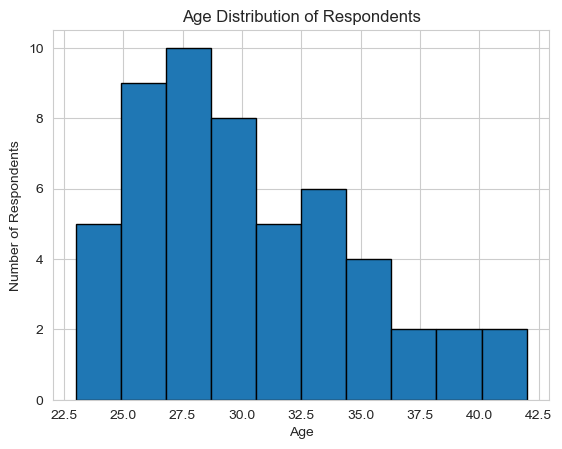

Mean Age: 30.150943396226417
Median Age: 29.0
Standard Deviation of Age: 4.7612063210230415
Range of Age: 19


In [276]:
# Age Distribution Analysis:

import pandas as pd
import matplotlib.pyplot as plt

# Prepare the Data
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


# Plotting the Histogram
plt.hist(df['Age'], bins=10, edgecolor='black')  # You can adjust the number of bins
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

# Calculating Descriptive Statistics
mean_age = df['Age'].mean()
median_age = df['Age'].median()
std_dev_age = df['Age'].std()
age_range = df['Age'].max() - df['Age'].min()

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Standard Deviation of Age: {std_dev_age}")
print(f"Range of Age: {age_range}")


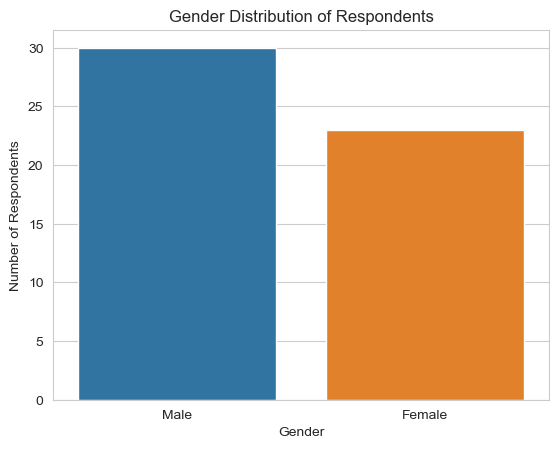

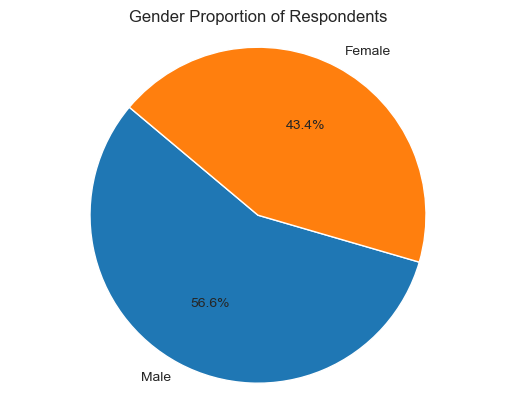

In [277]:
# Gender Ratio Analysis:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and the gender column is 'Gender'

# Countplot
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution of Respondents')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.show()

# Pie Chart
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Gender Proportion of Respondents')
plt.show()



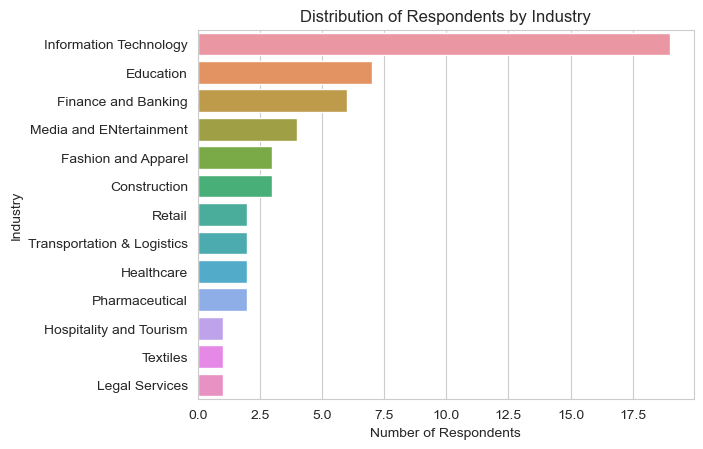

In [278]:
# Diversity Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# Replace 'Industry', 'JobTitle', 'EducationLevel' with your actual column names

# Bar Chart for Industry Distribution
sns.countplot(y='Industry', data=df, order = df['Industry'].value_counts().index)
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.show()

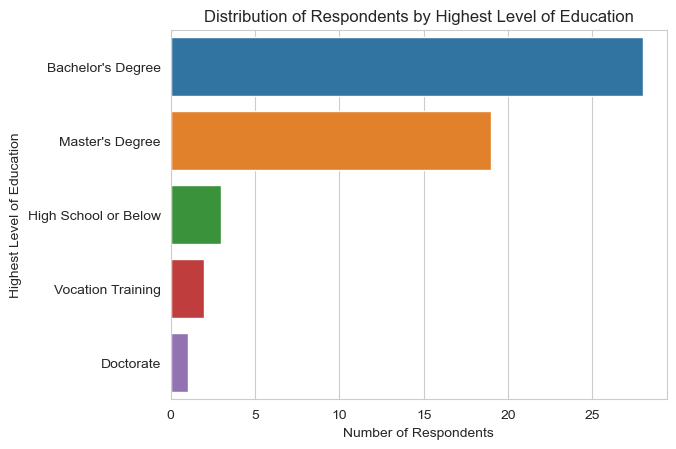

In [279]:
# Bar Chart for Highest Level of Education Distribution
sns.countplot(y='EducationLevel', data=df, order = df['EducationLevel'].value_counts().index)
plt.title('Distribution of Respondents by Highest Level of Education')
plt.xlabel('Number of Respondents')
plt.ylabel('Highest Level of Education')
plt.show()

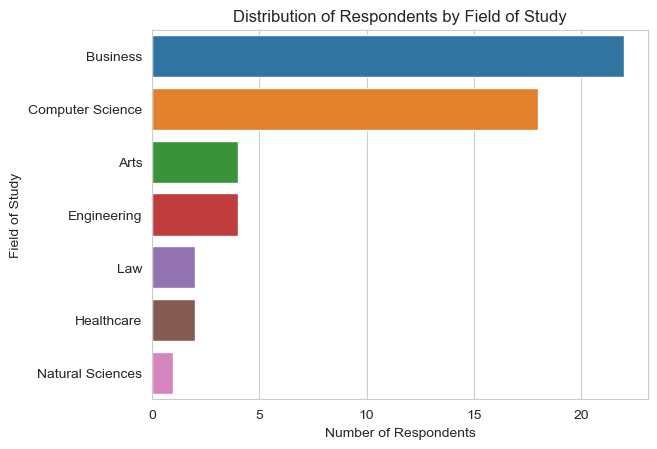

In [280]:
# Bar Chart for Field of Study Distribution
sns.countplot(y='StudyField', data=df, order = df['StudyField'].value_counts().index)
plt.title('Distribution of Respondents by Field of Study')
plt.xlabel('Number of Respondents')
plt.ylabel('Field of Study')
plt.show()

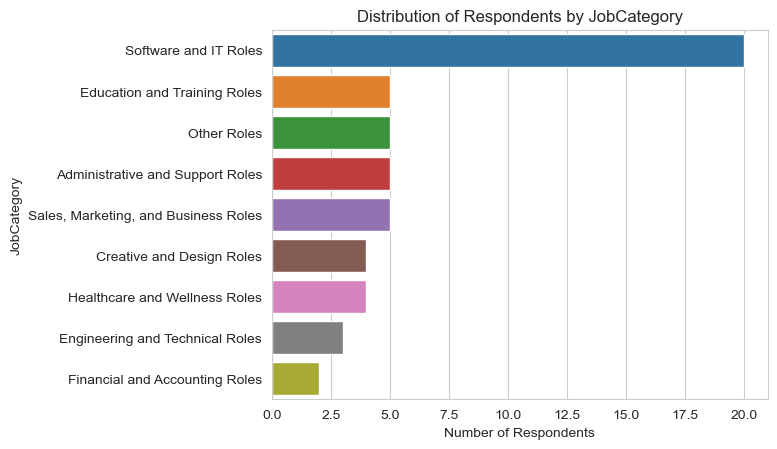

array(['Chashier ', 'Bank Assistent', 'Quality Supervisor', 'HR Maneger ',
       'Lawyer'], dtype=object)

In [281]:
# Bar Chart for Job Catetgory
sns.countplot(y='JobCategory', data=df, order = df['JobCategory'].value_counts().index)
plt.title('Distribution of Respondents by JobCategory')
plt.xlabel('Number of Respondents')
plt.ylabel('JobCategory')
plt.show()

other_roles_df = df[df['JobCategory'] == 'Other Roles']
unique_other_roles = other_roles_df['JobTitle'].unique()
unique_other_roles

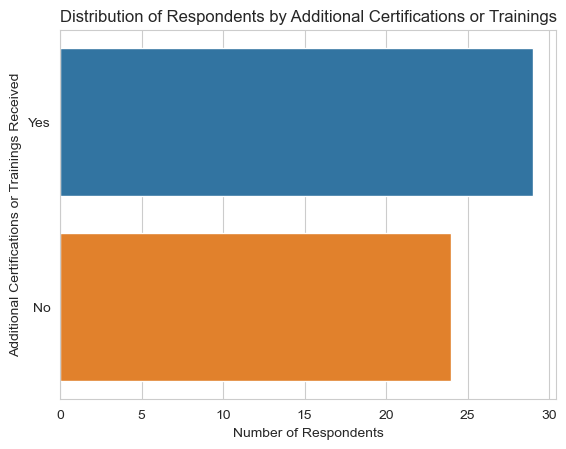

In [282]:
# Bar Chart for Additional Certifications or Trainings Received
sns.countplot(y='HasCertifications', data=df, order = df['HasCertifications'].value_counts().index)
plt.title('Distribution of Respondents by Additional Certifications or Trainings')
plt.xlabel('Number of Respondents')
plt.ylabel('Additional Certifications or Trainings Received')
plt.show()

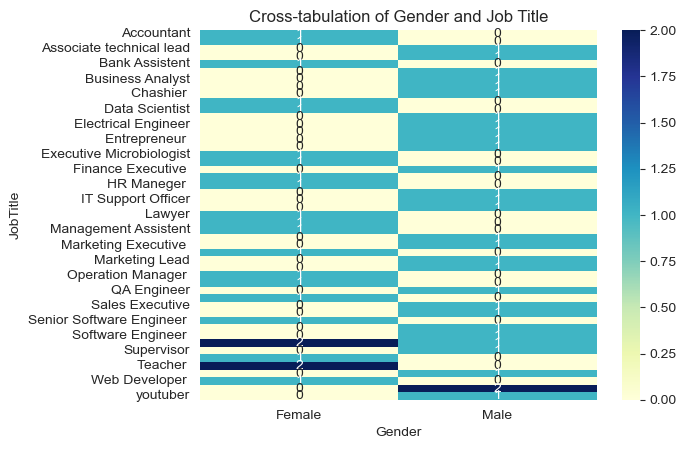

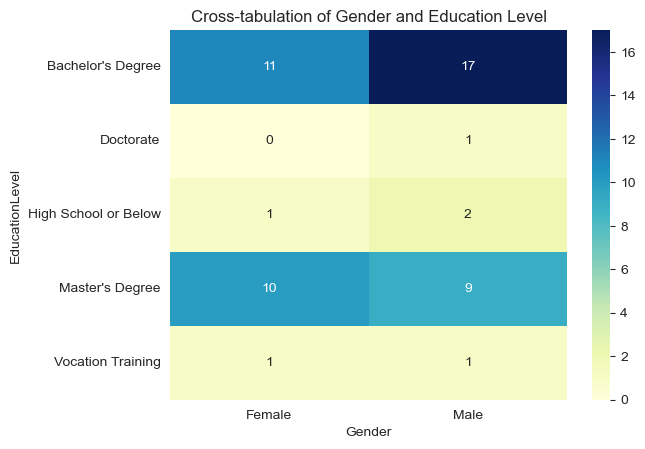

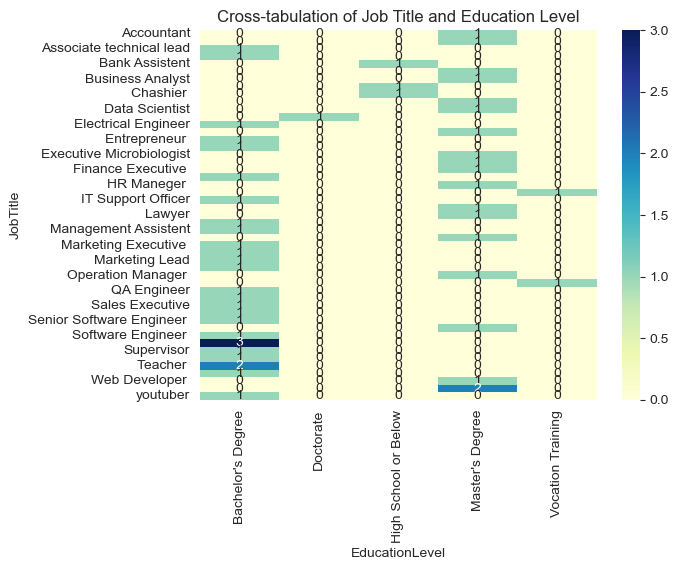

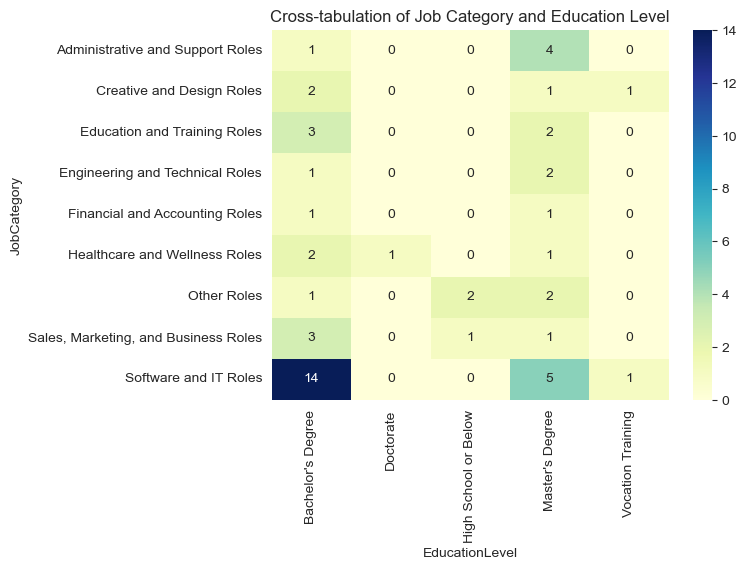

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cross-tabulation of Gender and JobTitle
cross_tab = pd.crosstab(df['JobTitle'], df['Gender'])
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.title('Cross-tabulation of Gender and Job Title')
plt.show()

# Cross-tabulation of Gender and EducationLevel
cross_tab = pd.crosstab(df['EducationLevel'], df['Gender'])
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.title('Cross-tabulation of Gender and Education Level')
plt.show()

# Cross-tabulation of JobTitle and EducationLevel
cross_tab = pd.crosstab(df['JobTitle'], df['EducationLevel'])
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.title('Cross-tabulation of Job Title and Education Level')
plt.show()

# Cross-tabulation of JobCategory and EducationLevel
cross_tab = pd.crosstab(df['JobCategory'], df['EducationLevel'])
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.title('Cross-tabulation of Job Category and Education Level')
plt.show()


In [311]:
# Relationship between years of experience in the current field and skill proficiency levels.
import scipy.stats as stats

# Assuming your DataFrame is named df
# ANOVA (Analysis of Variance): This test is used to determine if there are any statistically significant differences between the means of three or more independent (unrelated) groups. In your case, it's used to see if the average proficiency levels in each skill vary significantly across different industries.

# Looping through each skill and performing ANOVA
for skill in skills_proficiency.keys():
    groups = df.groupby('Industry')[skills_proficiency[skill]].apply(list)
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"ANOVA on {skill} across Industries: F-statistic = {f_stat}, p-value = {p_val}")

print()
# Looping through each skill and performing ANOVA
for skill in skills_proficiency.keys():
    groups = df.groupby('JobCategory')[skills_proficiency[skill]].apply(list)
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"ANOVA on {skill} across JobCategory: F-statistic = {f_stat}, p-value = {p_val}")



ANOVA on Technical Skills across Industries: F-statistic = 0.9331892346257188, p-value = 0.524663787515268
ANOVA on Analytical Skills across Industries: F-statistic = 1.3907532726503145, p-value = 0.2104674087524718
ANOVA on Management Skills across Industries: F-statistic = 0.42327490330756007, p-value = 0.9449424509336034
ANOVA on Communication Skills across Industries: F-statistic = 0.6104808705109794, p-value = 0.8203878361673888
ANOVA on Creative Skills across Industries: F-statistic = 2.0975464483139215, p-value = 0.039784565096754376
ANOVA on Interpersonal Skills across Industries: F-statistic = 0.6159516560536933, p-value = 0.8158337518169889
ANOVA on Problem Solving Skills across Industries: F-statistic = 1.0139562846689227, p-value = 0.4547828716383822
ANOVA on Leadership Skills across Industries: F-statistic = 0.8554222487987546, p-value = 0.5959709939880118

ANOVA on Technical Skills across JobCategory: F-statistic = 0.8559993047642958, p-value = 0.5599245376149002
ANOVA on

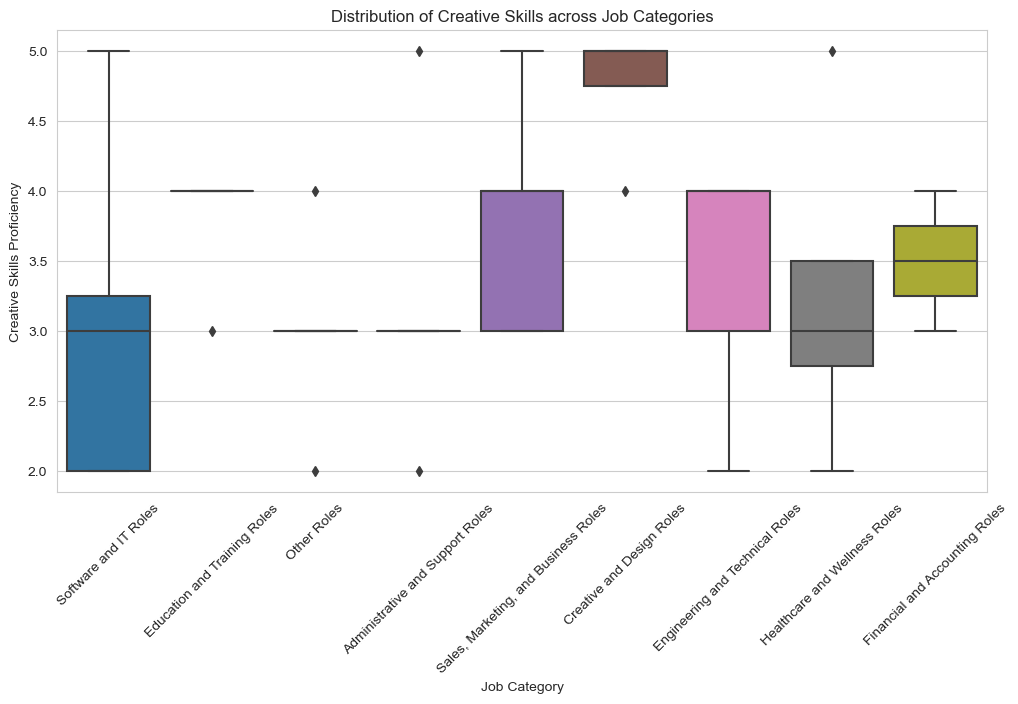

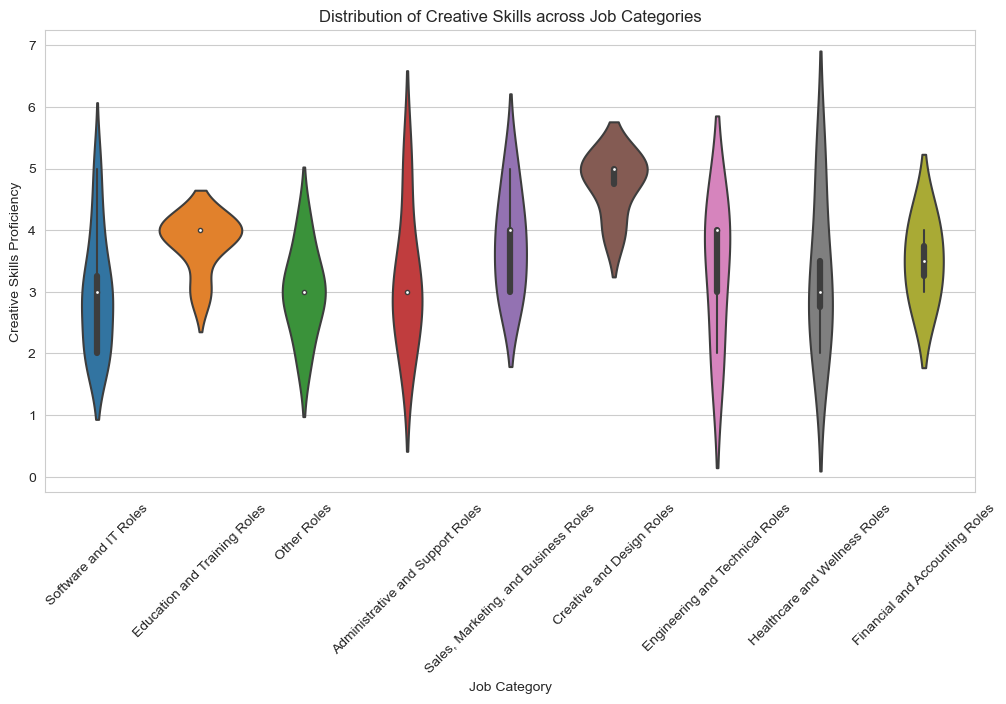

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for Creative Skills across different Job Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobCategory', y='CreativeSkillProficiency', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Creative Skills across Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Creative Skills Proficiency')
plt.show()

# Violin plot for Creative Skills across different Job Categories
plt.figure(figsize=(12, 6))
sns.violinplot(x='JobCategory', y='CreativeSkillProficiency', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Creative Skills across Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Creative Skills Proficiency')
plt.show()


In [286]:
from scipy.stats import ttest_ind


# The impact of additional certifications or trainings on professional development and skill proficiency.
for skill, col_name in skills_proficiency.items():
    # Convert to numeric, set invalid parsing as NaN
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

    # Groups based on having certifications or trainings
    group_yes = df[df['HasCertifications'] == 'Yes'][col_name]
    group_no = df[df['HasCertifications'] == 'No'][col_name]

    # T-test
    stat, p_value = ttest_ind(group_yes, group_no, nan_policy='omit')
    print(f'{skill}: Stat = {stat}, P-value = {p_value}')


Technical Skills: Stat = 1.5973924171820406, P-value = 0.11635650579941152
Analytical Skills: Stat = 3.20899859942955, P-value = 0.002304542849044228
Management Skills: Stat = 2.0880651987475436, P-value = 0.04180459702406304
Communication Skills: Stat = 3.0179382160898167, P-value = 0.003965568709387793
Creative Skills: Stat = 4.024411396528636, P-value = 0.00018963858559889723
Interpersonal Skills: Stat = 2.1681102807319714, P-value = 0.034840366923092184
Problem Solving Skills: Stat = 1.9405732241401599, P-value = 0.05784758505011954
Leadership Skills: Stat = 2.277121880043071, P-value = 0.027004758231706005


Technical Skills: Stat = 1.5973924171820406, P-value = 0.11635650579941152


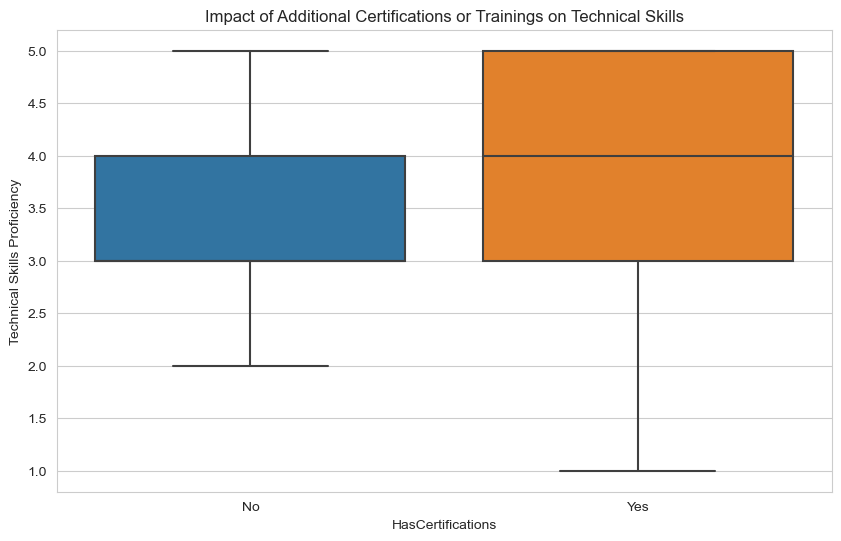

Analytical Skills: Stat = 3.20899859942955, P-value = 0.002304542849044228


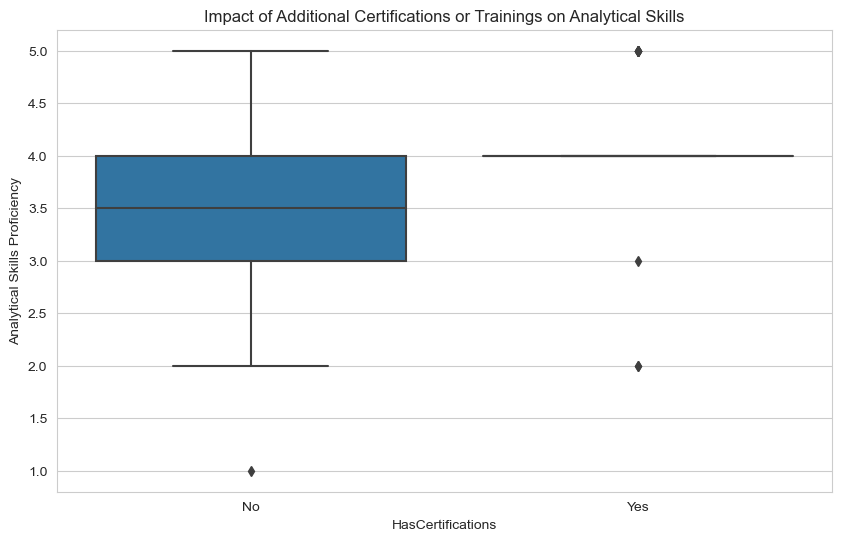

Management Skills: Stat = 2.0880651987475436, P-value = 0.04180459702406304


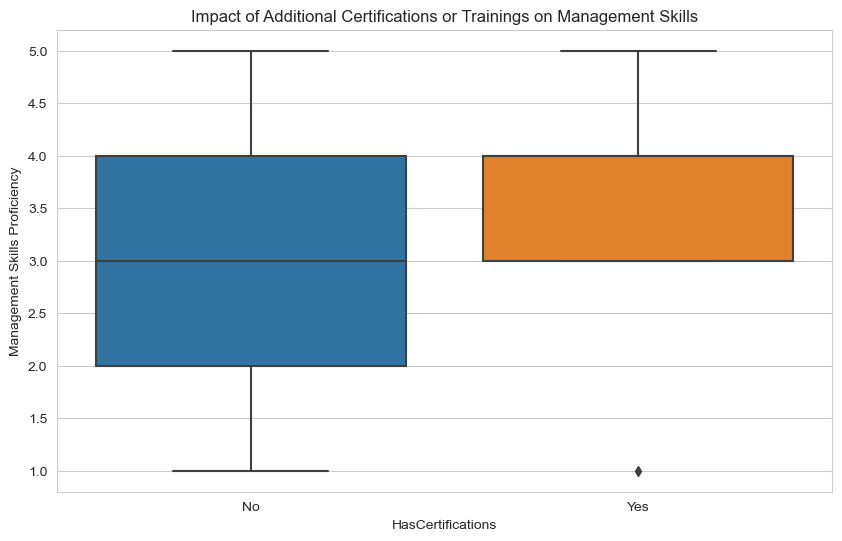

Communication Skills: Stat = 3.0179382160898167, P-value = 0.003965568709387793


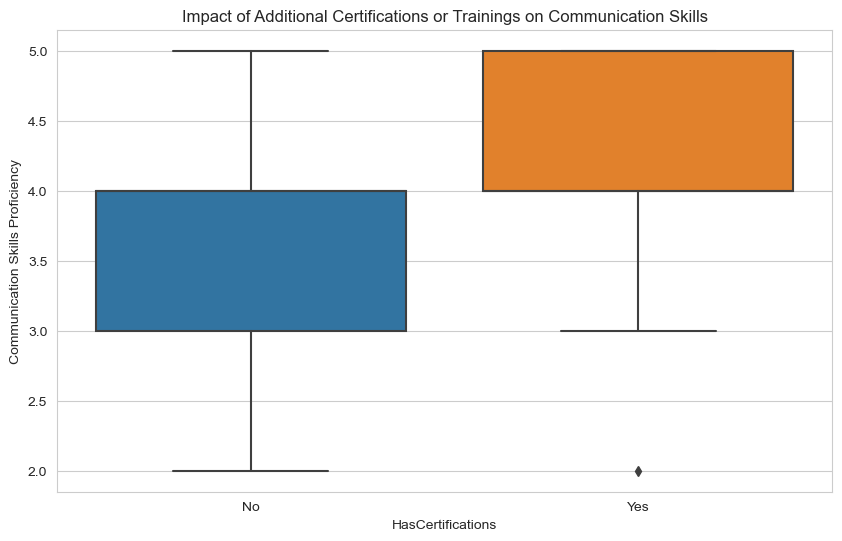

Creative Skills: Stat = 4.024411396528636, P-value = 0.00018963858559889723


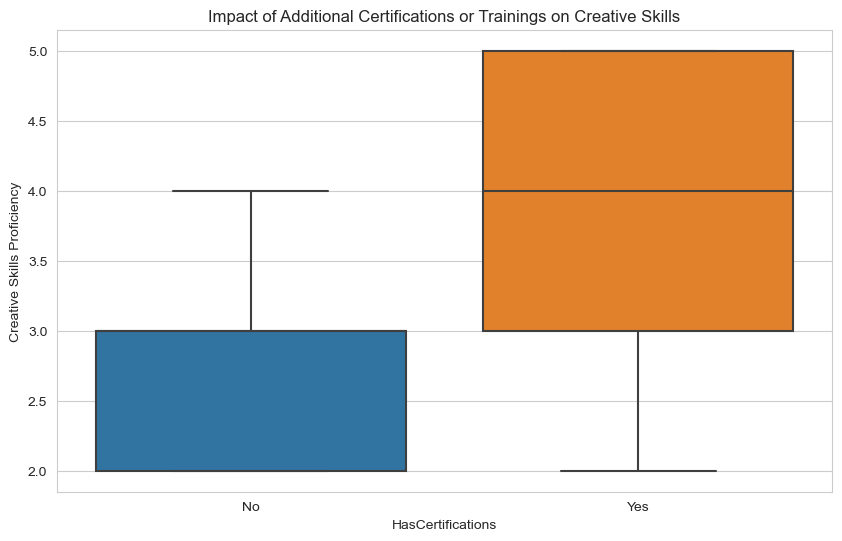

Interpersonal Skills: Stat = 2.1681102807319714, P-value = 0.034840366923092184


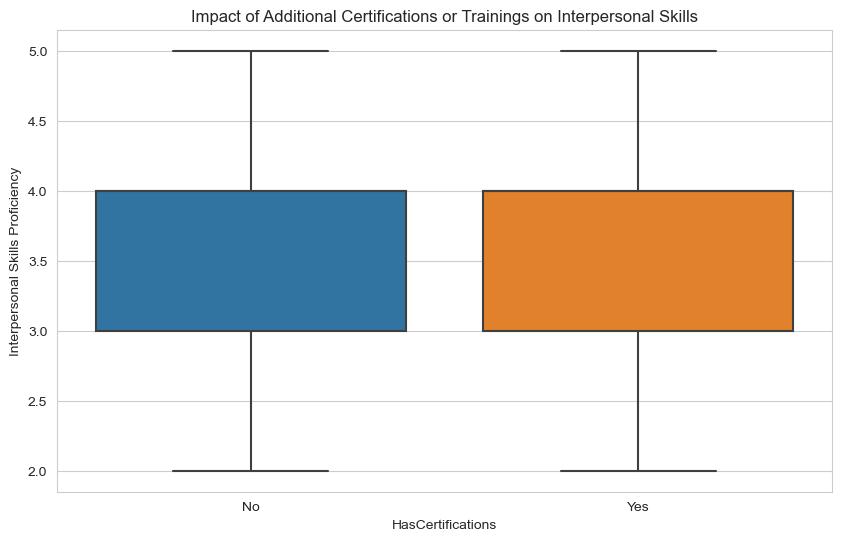

Problem Solving Skills: Stat = 1.9405732241401599, P-value = 0.05784758505011954


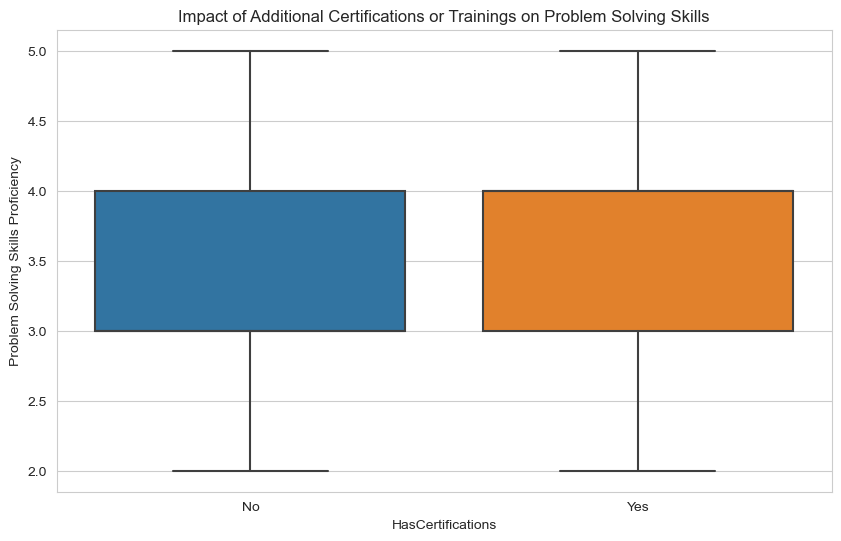

Leadership Skills: Stat = 2.277121880043071, P-value = 0.027004758231706005


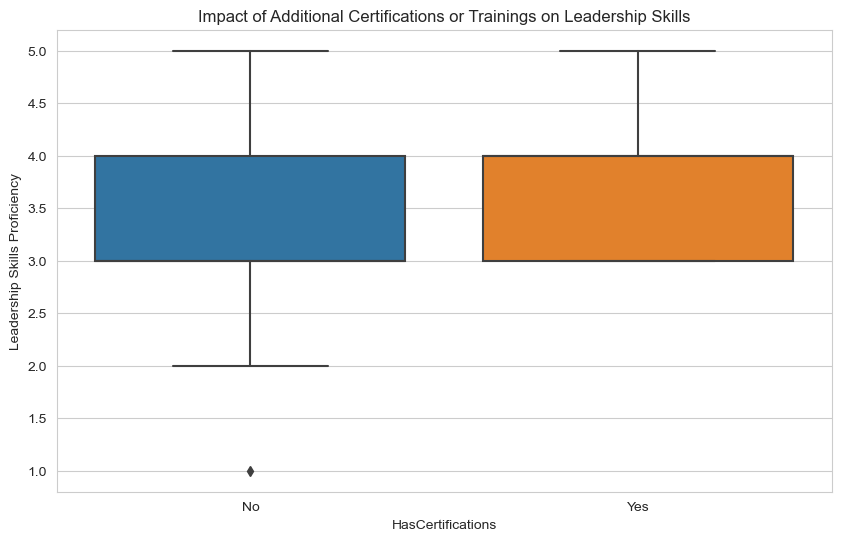

In [314]:
for skill, col_name in skills_proficiency.items():
    # Convert to numeric, handling non-numeric as NaN
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

    # Create groups based on certifications or trainings
    group_yes = df[df['HasCertifications'] == 'Yes'][col_name]
    group_no = df[df['HasCertifications'] == 'No'][col_name]

    # T-test
    stat, p_value = ttest_ind(group_yes, group_no, nan_policy='omit')
    print(f'{skill}: Stat = {stat}, P-value = {p_value}')

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='HasCertifications', y=col_name, data=df)
    plt.title(f'Impact of Additional Certifications or Trainings on {skill}')
    plt.ylabel(f'{skill} Proficiency')
    plt.show()


In [288]:
print(df[skills_proficiency.values()].describe())

       TechSkillProficiency  AnalyticalSkillProficiency  \
count             53.000000                   53.000000   
mean               3.622642                    3.735849   
std                1.041936                    0.901941   
min                1.000000                    1.000000   
25%                3.000000                    3.000000   
50%                4.000000                    4.000000   
75%                4.000000                    4.000000   
max                5.000000                    5.000000   

       ManagementSkillProficiency  CommunicationSkillProficiency  \
count                   53.000000                      53.000000   
mean                     3.415094                       3.924528   
std                      0.949371                       0.805010   
min                      1.000000                       2.000000   
25%                      3.000000                       3.000000   
50%                      4.000000                       4.00

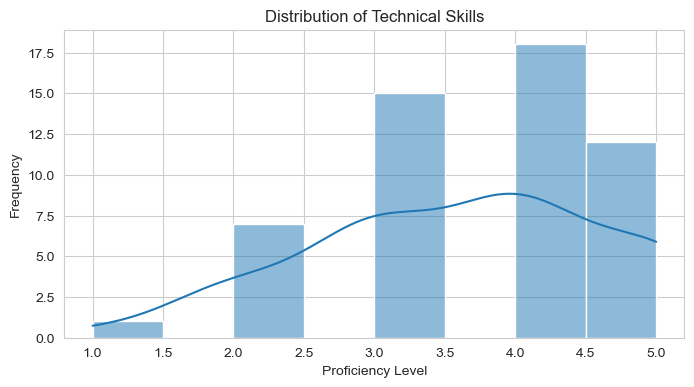

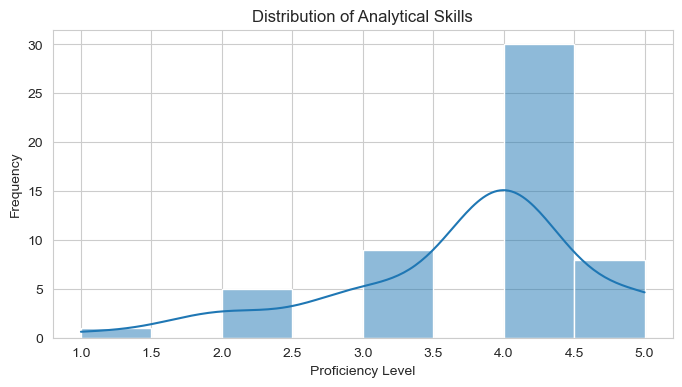

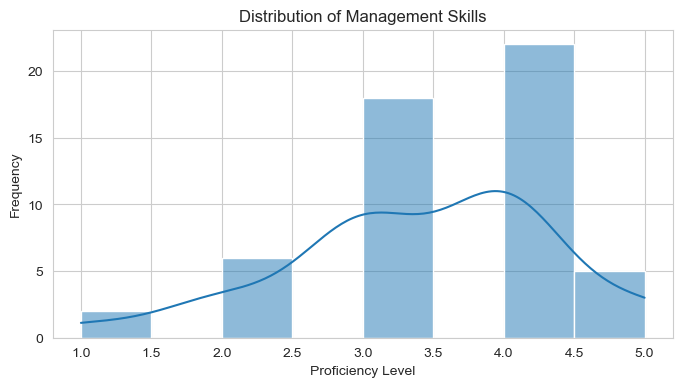

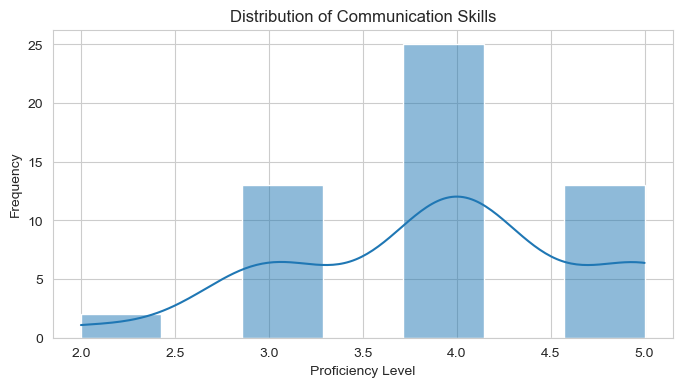

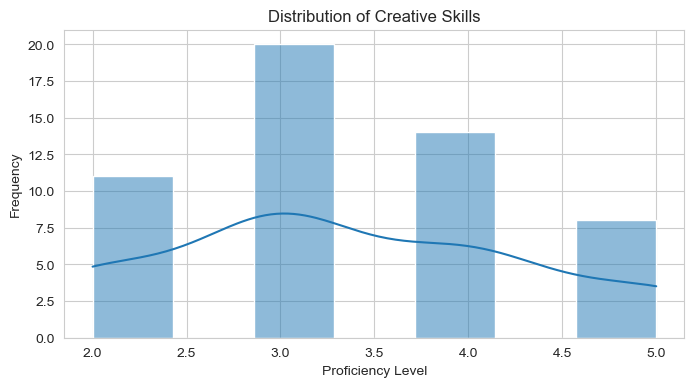

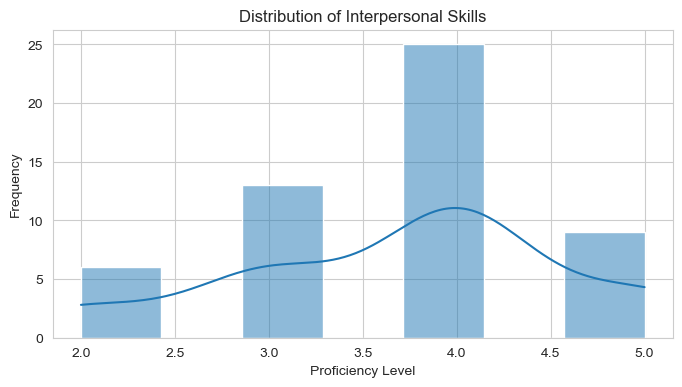

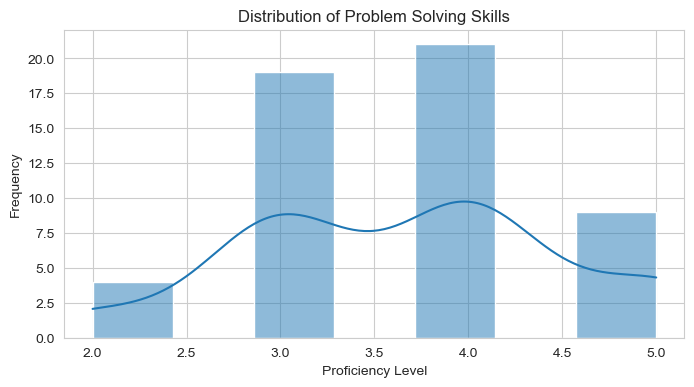

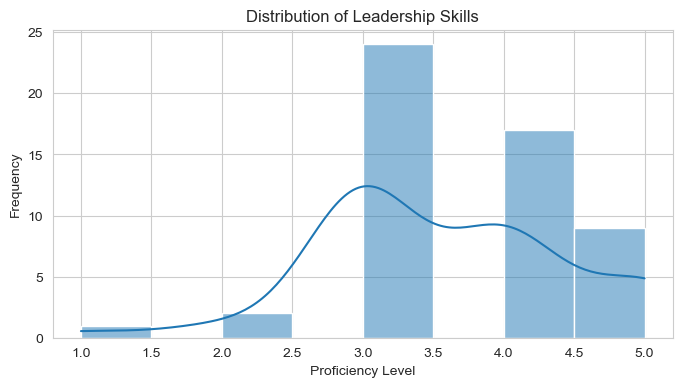

In [289]:
for skill, col_name in skills_proficiency.items():
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col_name], kde=True)
    plt.title(f'Distribution of {skill}')
    plt.xlabel('Proficiency Level')
    plt.ylabel('Frequency')
    plt.show()


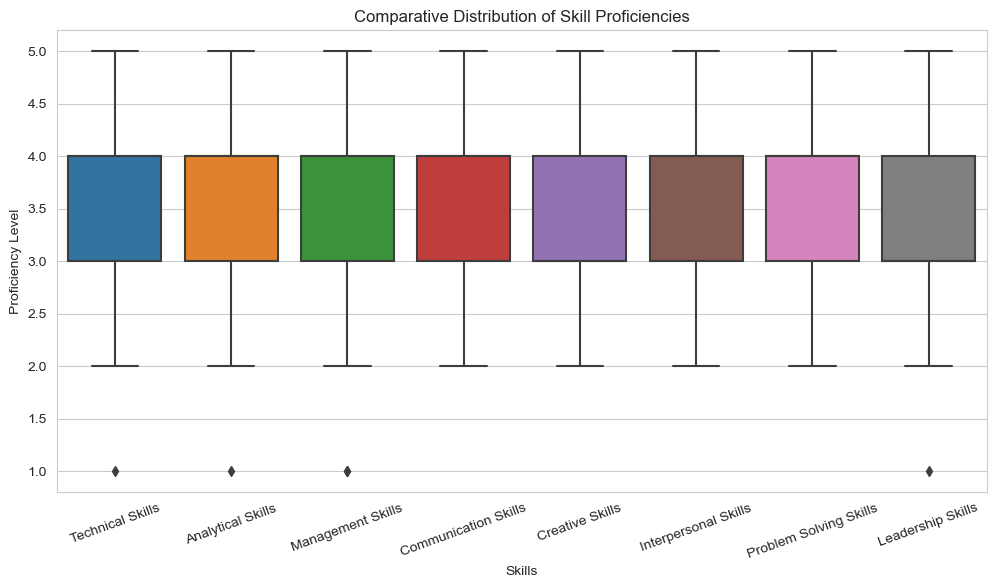

In [290]:
# Prepare data for comparative box plot
skill_data = df[list(skills_proficiency.values())]

plt.figure(figsize=(12, 6))
sns.boxplot(data=skill_data)
plt.title('Comparative Distribution of Skill Proficiencies')
plt.xlabel('Skills')
plt.ylabel('Proficiency Level')
plt.xticks(ticks=range(len(skills_proficiency)), labels=list(skills_proficiency.keys()), rotation=20)
plt.show()


In [291]:
df[skills_acquisition[next(iter(skills_proficiency))]].unique()

array(['On the Job Training', 'Formal Education', 'Online Courses',
       'Self Taught', 'Other', 'Mentorship',
       'Formal Education, On the Job Training, Self Taught, Online Courses, Mentorship, Other',
       'Formal Education, Self Taught, Online Courses, Mentorship',
       'Formal Education, On the Job Training, Self Taught, Online Courses, Mentorship',
       'On the Job Training, Self Taught, Online Courses, Mentorship'],
      dtype=object)

In [316]:
from scipy.stats import f_oneway
# Function to expand rows based on acquisition methods
def expand_rows(row, proficiency_col, acquisition_col):
    methods = row[acquisition_col].split(', ')
    num_methods = len(methods)
    weight = 1 / num_methods
    return pd.DataFrame({
        proficiency_col: [row[proficiency_col] * weight] * num_methods,
        acquisition_col: methods
    })

method_order = ['Formal Education', 'On the Job Training', 'Online Courses',
                'Self Taught', 'Mentorship', 'Other'
                # Add other combinations or methods as needed
                ]

# Analysis for each skill
for skill, col_name in skills_proficiency.items():
    # Expand the DataFrame for each skill
    expanded_rows = pd.concat([expand_rows(row, col_name, skills_acquisition[skill]) for _, row in df.iterrows()])

    # Descriptive analysis
    # print(expanded_rows[skills_acquisition[skill]].value_counts())

    # # Visualization
    # plt.figure(figsize=(10, 6))
    # sns.boxplot(x=expanded_rows[skills_acquisition[skill]], y=expanded_rows[col_name], order=method_order)
    # plt.title(f'Effectiveness of Skill Acquisition Methods on {skill}')
    # plt.xlabel('Acquisition Method')
    # plt.ylabel('Proficiency Level')
    # plt.show()

    # Statistical testing (ANOVA)
    methods = expanded_rows[skills_acquisition[skill]].unique()
    groups = [expanded_rows[expanded_rows[skills_acquisition[skill]] == m][col_name] for m in methods if m in expanded_rows[skills_acquisition[skill]].values]
    f_stat, p_value = f_oneway(*groups)
    print(f'ANOVA for {skill}: F-statistic = {f_stat}, P-value = {p_value}')


ANOVA for Technical Skills: F-statistic = 1.3272049404692603, P-value = 0.2633960563987715
ANOVA for Analytical Skills: F-statistic = 7.2356212725412, P-value = 2.531177136993078e-05
ANOVA for Management Skills: F-statistic = 2.0009465441871397, P-value = 0.09255472733117628
ANOVA for Communication Skills: F-statistic = 5.128391394450824, P-value = 0.0005560100281854337
ANOVA for Creative Skills: F-statistic = 3.898142830503868, P-value = 0.0044762072196478115
ANOVA for Interpersonal Skills: F-statistic = 0.7266986196273326, P-value = 0.5775229573535028
ANOVA for Problem Solving Skills: F-statistic = 0.9567195823855185, P-value = 0.45155079526074515
ANOVA for Leadership Skills: F-statistic = 0.3817423182051439, P-value = 0.8593330789861148


<Figure size 1500x800 with 0 Axes>

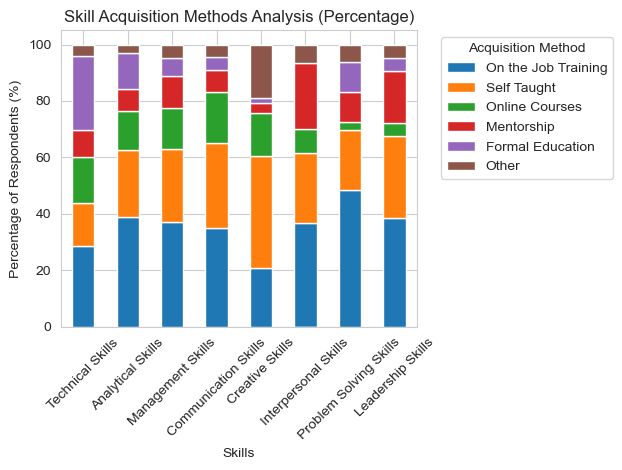

In [293]:
# Function to count the frequency of each method
def count_methods(df, column):
    return df[column].str.split(', ', expand=True).stack().value_counts()

# Initialize a DataFrame to store counts for each skill
method_counts = pd.DataFrame()

# Count the frequency of each method for each skill and store it in the DataFrame
for skill, col_name in skills_acquisition.items():
    method_counts[skill] = count_methods(df, col_name)

# Transpose for easier plotting
method_counts_transposed = method_counts.T

# Convert counts to percentages
method_counts_transposed = method_counts_transposed.div(method_counts_transposed.sum(axis=1), axis=0) * 100

# Sorting columns by total for visualization
method_counts_transposed = method_counts_transposed[method_counts_transposed.sum().sort_values(ascending=False).index]

# Plotting
plt.figure(figsize=(15, 8))
method_counts_transposed.plot(kind='bar', stacked=True)

plt.title('Skill Acquisition Methods Analysis (Percentage)')
plt.xlabel('Skills')
plt.ylabel('Percentage of Respondents (%)')
plt.xticks(rotation=45)
plt.legend(title='Acquisition Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [294]:
# Extracting the relevant columns for analysis
lacking_skills = df["LackingSkills"]
impact_ratings = df["ImpactOfSkillGap"]

# Creating a new dataframe for each lacking skill and its corresponding impact rating
lacking_skills_split = lacking_skills.str.split(', ', expand=True)
impact_ratings_repeated = impact_ratings.repeat(lacking_skills_split.count(axis=1)).reset_index(drop=True)

# Melting the dataframe to create a long format dataframe
lacking_skills_long = pd.melt(lacking_skills_split)
lacking_skills_long['impact'] = impact_ratings_repeated
lacking_skills_long = lacking_skills_long.dropna().drop('variable', axis=1).rename(columns={'value': 'skill'})

# Grouping by skill and calculating the average impact rating
average_impact_per_skill = lacking_skills_long.groupby('skill')['impact'].mean().sort_values(ascending=False)

# Recalculating the frequency of each skill gap
lacking_skills_frequency = lacking_skills_long['skill'].value_counts()

# Displaying the results
print("Frequency of each skill gap:")
print(lacking_skills_frequency)
print("\nAverage Impact Rating of each skill gap on job performance:")
print(average_impact_per_skill)


Frequency of each skill gap:
skill
Technical Skills          24
Analytical Skills         24
Communication Skills      22
Management Skills         17
Creative Skills           13
Interpersonal Skills      13
Problem Solving Skills     8
Leadership Skills          6
Name: count, dtype: int64

Average Impact Rating of each skill gap on job performance:
skill
Technical Skills          3.208333
Interpersonal Skills      2.923077
Communication Skills      2.772727
Management Skills         2.705882
Creative Skills           2.692308
Leadership Skills         2.666667
Analytical Skills         2.458333
Problem Solving Skills    2.250000
Name: impact, dtype: float64


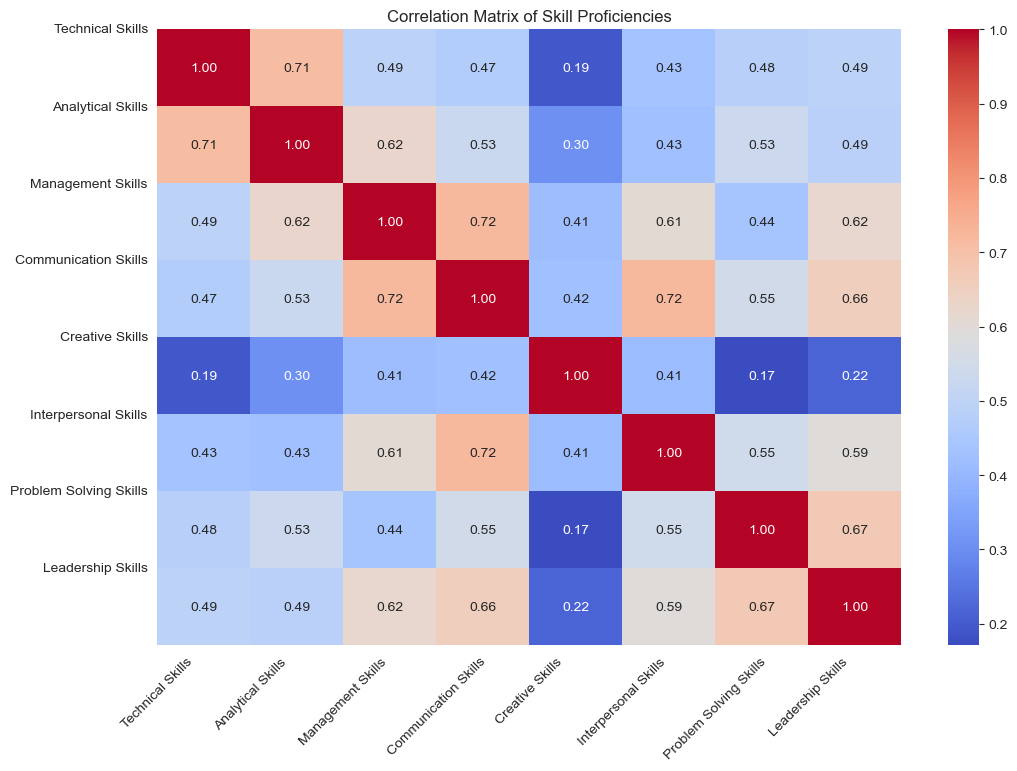

In [295]:
proficiency_data = df[list(skills_proficiency.values())].rename(columns=skills_proficiency)
# Calculating the correlation matrix
correlation_matrix = proficiency_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(ticks=range(len(skills_proficiency)), labels=skills_proficiency.keys(), rotation=45)
plt.yticks(ticks=range(len(skills_proficiency)), labels=skills_proficiency.keys(), rotation=0)

plt.title("Correlation Matrix of Skill Proficiencies")
plt.show()


In [296]:
# Inverting the skills_proficiency dictionary for reverse mapping
skills_proficiency_reversed = {v: k for k, v in skills_proficiency.items()}

# Flattening the correlation matrix and converting to a DataFrame
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Skill_1', 'Skill_2', 'Correlation']

# Renaming the skills in the correlation pairs
correlation_pairs['Skill_1'] = correlation_pairs['Skill_1'].map(skills_proficiency_reversed)
correlation_pairs['Skill_2'] = correlation_pairs['Skill_2'].map(skills_proficiency_reversed)

# Removing self-correlations and duplicates
correlation_pairs = correlation_pairs[correlation_pairs['Skill_1'] != correlation_pairs['Skill_2']]
correlation_pairs['Abs_Correlation'] = correlation_pairs['Correlation'].abs()

# Avoid counting correlations twice (A vs B and B vs A are the same)
correlation_pairs['sorted_skills'] = correlation_pairs.apply(lambda row: tuple(sorted([row['Skill_1'], row['Skill_2']])), axis=1)
correlation_pairs = correlation_pairs.drop_duplicates(subset=['sorted_skills']).drop('sorted_skills', axis=1)

# Sorting by absolute value of correlation
correlation_pairs_sorted = correlation_pairs.sort_values(by='Abs_Correlation', ascending=False)

# Extracting top 10 correlations
top_10_correlations = correlation_pairs_sorted.head(10)
top_10_correlations


,Skill_1,Skill_2,Correlation,Abs_Correlation
19,Management Skills,Communication Skills,0.721176,0.721176
29,Communication Skills,Interpersonal Skills,0.719317,0.719317
1,Technical Skills,Analytical Skills,0.710427,0.710427
55,Problem Solving Skills,Leadership Skills,0.674177,0.674177
31,Communication Skills,Leadership Skills,0.655873,0.655873
10,Analytical Skills,Management Skills,0.624603,0.624603
23,Management Skills,Leadership Skills,0.619946,0.619946
21,Management Skills,Interpersonal Skills,0.606501,0.606501
47,Interpersonal Skills,Leadership Skills,0.593840,0.593840
30,Communication Skills,Problem Solving Skills,0.549703,0.549703


In [297]:
import pandas as pd
import itertools

# Inverting the dictionary for renaming
skills_proficiency_reversed = {v: k for k, v in skills_proficiency.items()}

# Renaming the columns and rows of the correlation matrix
renamed_correlation_matrix = correlation_matrix.rename(index=skills_proficiency_reversed, columns=skills_proficiency_reversed)

# Generate all combinations of three skills
skill_combinations = itertools.combinations(skills_proficiency.keys(), 3)

# Calculate the average of pairwise correlations for each combination
average_correlations = {}
for combo in skill_combinations:
    skill_1, skill_2, skill_3 = combo
    avg_corr = (renamed_correlation_matrix.at[skill_1, skill_2] +
                renamed_correlation_matrix.at[skill_1, skill_3] +
                renamed_correlation_matrix.at[skill_2, skill_3]) / 3
    average_correlations[combo] = avg_corr

# Sort combinations by average correlation
sorted_combinations = sorted(average_correlations.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 combinations
top_10_combinations = sorted_combinations[:10]

# Creating a DataFrame for the top 10 combinations
top_10_df = pd.DataFrame({
    'Skill 1': [combo[0][0] for combo in top_10_combinations],
    'Skill 2': [combo[0][1] for combo in top_10_combinations],
    'Skill 3': [combo[0][2] for combo in top_10_combinations],
    'Average Correlation': [combo[1] for combo in top_10_combinations]
})

top_10_df


,Skill 1,Skill 2,Skill 3,Average Correlation
0,Management Skills,Communication Skills,Interpersonal Skills,0.682331
1,Management Skills,Communication Skills,Leadership Skills,0.665665
2,Communication Skills,Interpersonal Skills,Leadership Skills,0.656343
3,Communication Skills,Problem Solving Skills,Leadership Skills,0.626585
4,Analytical Skills,Management Skills,Communication Skills,0.624667
5,Technical Skills,Analytical Skills,Management Skills,0.608975
6,Management Skills,Interpersonal Skills,Leadership Skills,0.606762
7,Communication Skills,Interpersonal Skills,Problem Solving Skills,0.605025
8,Interpersonal Skills,Problem Solving Skills,Leadership Skills,0.604691
9,Management Skills,Problem Solving Skills,Leadership Skills,0.577493


In [298]:
average_proficiency = df[list(skills_proficiency.values())].mean()

# Determine skill gap frequency
lacking_skills = df["LackingSkills"]
lacking_skills_list = lacking_skills.str.split(', ').explode()
lacking_skills_frequency = lacking_skills_list.value_counts()

# Prepare the data for gap analysis
# Update the renaming if needed based on your skills_proficiency structure
average_proficiency = average_proficiency.rename(skills_proficiency_reversed)
skill_gap_frequency_df = lacking_skills_frequency.to_frame(name='Gap Frequency')

# Combine the proficiency ratings with the gap frequency
combined_gap_analysis = pd.concat([average_proficiency, skill_gap_frequency_df], axis=1, sort=False)

# Display the combined analysis
combined_gap_analysis_sorted = combined_gap_analysis.sort_values(by='Gap Frequency', ascending=False)
print(combined_gap_analysis_sorted)


                               0  Gap Frequency
Communication Skills    3.924528             27
Technical Skills        3.622642             24
Analytical Skills       3.735849             24
Interpersonal Skills    3.698113             22
Leadership Skills       3.584906             19
Management Skills       3.415094             17
Creative Skills         3.358491             15
Problem Solving Skills  3.660377             14
                             NaN              1


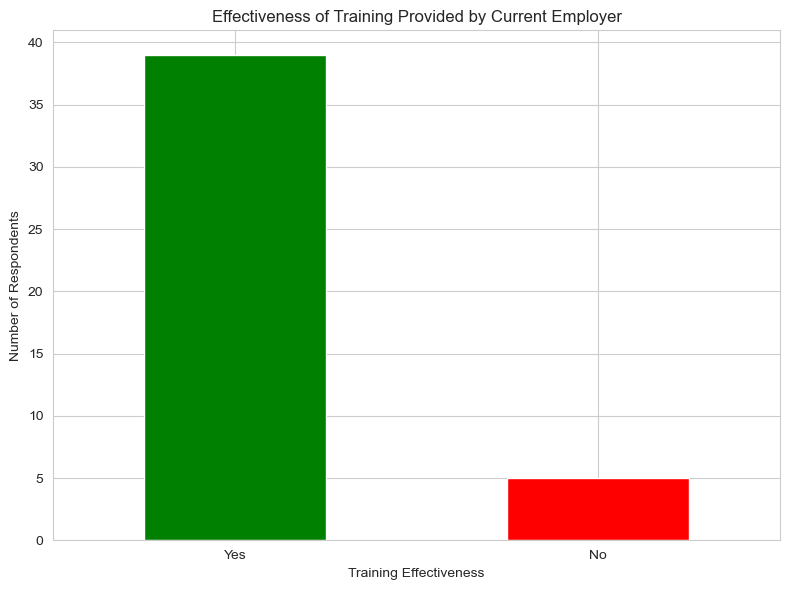

In [299]:
# Extract the training effectiveness column and drop NaN values
training_effectiveness_column = 'TrainingEffectiveness'
training_effectiveness_ratings = df[training_effectiveness_column].dropna()

# Count the number of 'Yes' and 'No' responses
training_effectiveness_count = training_effectiveness_ratings.value_counts()

# Plotting the bar chart with a tight layout
plt.figure(figsize=(8, 6))
training_effectiveness_count.plot(kind='bar', color=['green', 'red'])
plt.title('Effectiveness of Training Provided by Current Employer')
plt.xlabel('Training Effectiveness')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjusting layout to fit all elements
plt.show()


<Figure size 800x600 with 0 Axes>

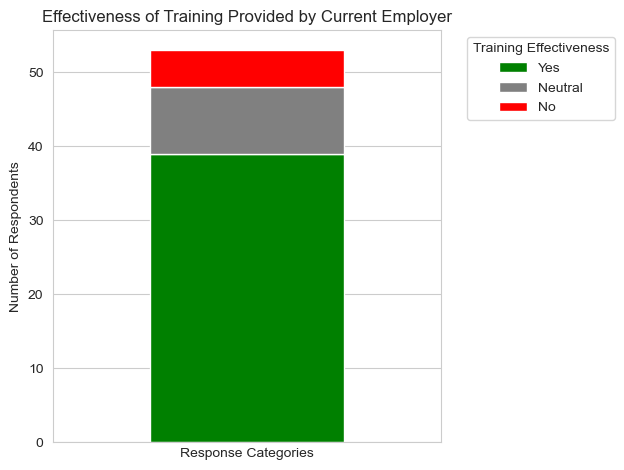

In [317]:
# Replace NaN values with 'Neutral' in the training effectiveness column
training_effectiveness_column = 'TrainingEffectiveness'
training_effectiveness_ratings = df[training_effectiveness_column].fillna('Neutral')

# Count the number of 'Yes', 'No', and 'Neutral' responses
training_effectiveness_count = training_effectiveness_ratings.value_counts()

# Create a DataFrame for plotting
training_effectiveness_df = pd.DataFrame(training_effectiveness_count).T

# Plotting the bar chart with stacked values
plt.figure(figsize=(8, 6))
training_effectiveness_df.plot(kind='bar', stacked=True, color=['green', 'gray', 'red'])
plt.title('Effectiveness of Training Provided by Current Employer')
plt.xlabel('Response Categories')
plt.ylabel('Number of Respondents')
plt.xticks([])
plt.legend(title='Training Effectiveness', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [301]:
import pandas as pd
from collections import Counter
import itertools

# Function to clean and split the response strings into a list of individual skills or training areas
def extract_skills_or_training(response_series):
    split_skills = response_series.str.split(',').apply(lambda x: [skill.strip() for skill in x])
    all_skills = list(itertools.chain(*split_skills))
    return all_skills

# Function to analyze desired training areas and future essential skills
def analyze_skills(data):
    # Desired training areas
    desired_training = extract_skills_or_training(data['DesiredAdditionalTraining'])
    training_counts = Counter(desired_training)

    # Future essential skills
    future_essential_skills = extract_skills_or_training(data['FutureEssentialSkills'])
    future_skills_counts = Counter(future_essential_skills)

    return training_counts, future_skills_counts


training_counts, future_skills_counts = analyze_skills(df)
# Display the results
print("Desired Training Areas:")
for skill, count in training_counts.most_common():
    print(f"{skill}: {count}")

print("\nFuture Essential Skills:")
for skill, count in future_skills_counts.most_common():
    print(f"{skill}: {count}")


Desired Training Areas:
Technical Training: 30
Interpersonal Skills Training: 30
Communication Training: 26
Analytical Training: 26
Management Training: 24
Leadership Training: 23
Problem-Solving Training: 18
Creative Training: 8

Future Essential Skills:
Communication Skills: 30
Management Skills: 29
Analytical Skills: 29
Leadership Skills: 28
Technical Skills: 26
Interpersonal Skills: 25
Problem-Solving Skills: 17
Creative Skills: 12
: 1


In [302]:
# Function to extract and count skills
def extract_and_count_skills(response_series):
    split_skills = response_series.dropna().astype(str).str.split(',').apply(lambda x: [skill.strip() for skill in x])
    all_skills = list(itertools.chain(*split_skills))
    return Counter(all_skills)

# Main execution for essential skills analysis

essential_skills_column = 'FutureEssentialSkills'
essential_skills_counts = extract_and_count_skills(df[essential_skills_column])
print("Essential Skills for Future Career Progression:")
for skill, count in essential_skills_counts.most_common():
    print(f"{skill}: {count}")


Essential Skills for Future Career Progression:
Communication Skills: 30
Management Skills: 29
Analytical Skills: 29
Leadership Skills: 28
Technical Skills: 26
Interpersonal Skills: 25
Problem-Solving Skills: 17
Creative Skills: 12
: 1


In [303]:
# Main execution for plans and methods of skill acquisition
plans_for_skills_acquisition_column = 'PlansToAcquireSkills'
methods_for_skills_acquisition_column = 'SkillsAcquisitionPlan'

plans_for_skills_acquisition = df[plans_for_skills_acquisition_column].value_counts()
methods_acquisition_counts = extract_and_count_skills(df[methods_for_skills_acquisition_column])

print("Plans to Acquire Future Skills:")
print(plans_for_skills_acquisition)
print("\nPreferred Methods for Skill Acquisition:")
for method, count in methods_acquisition_counts.most_common():
    print(f"{method}: {count}")


Plans to Acquire Future Skills:
PlansToAcquireSkills
Yes    52
No      1
Name: count, dtype: int64

Preferred Methods for Skill Acquisition:
Self Study: 43
Workplace Training: 38
Online Courses: 34
Workshops and Seminars: 29
Mentorship: 13
Further Education: 7


In [304]:
# Function for readiness analysis
def analyze_readiness(data, proficiency_column, plans_column, methods_column):
    readiness_data = pd.DataFrame({
        'Current Proficiency': data[proficiency_column],
        'Plans to Acquire Skills': data[plans_column],
        'Preferred Methods': data[methods_column]
    })

    average_proficiency_by_plan = readiness_data.groupby('Plans to Acquire Skills')['Current Proficiency'].mean()
    methods_for_yes = extract_and_count_skills(readiness_data[readiness_data['Plans to Acquire Skills'] == 'Yes']['Preferred Methods'])

    return average_proficiency_by_plan, methods_for_yes

# Main execution for readiness analysis
current_proficiency_column = 'TechSkillProficiency'  # Updated column name
plans_for_skills_acquisition_column = 'PlansToAcquireSkills'
methods_for_skills_acquisition_column = 'SkillsAcquisitionPlan'

average_proficiency, methods_for_yes_counts = analyze_readiness(df, current_proficiency_column, plans_for_skills_acquisition_column, methods_for_skills_acquisition_column)

print("Average Current Technical Skill Proficiency by Plans for Future Skill Acquisition:")
for plan, avg_proficiency in average_proficiency.items():
    print(f"{plan}: {avg_proficiency}")

print("\nPreferred Methods for Skill Acquisition (Among those planning to acquire future skills):")
for method, count in methods_for_yes_counts.most_common():
    print(f"{method}: {count}")


Average Current Technical Skill Proficiency by Plans for Future Skill Acquisition:
No: 4.0
Yes: 3.6153846153846154

Preferred Methods for Skill Acquisition (Among those planning to acquire future skills):
Self Study: 43
Workplace Training: 38
Online Courses: 34
Workshops and Seminars: 29
Mentorship: 13
Further Education: 7


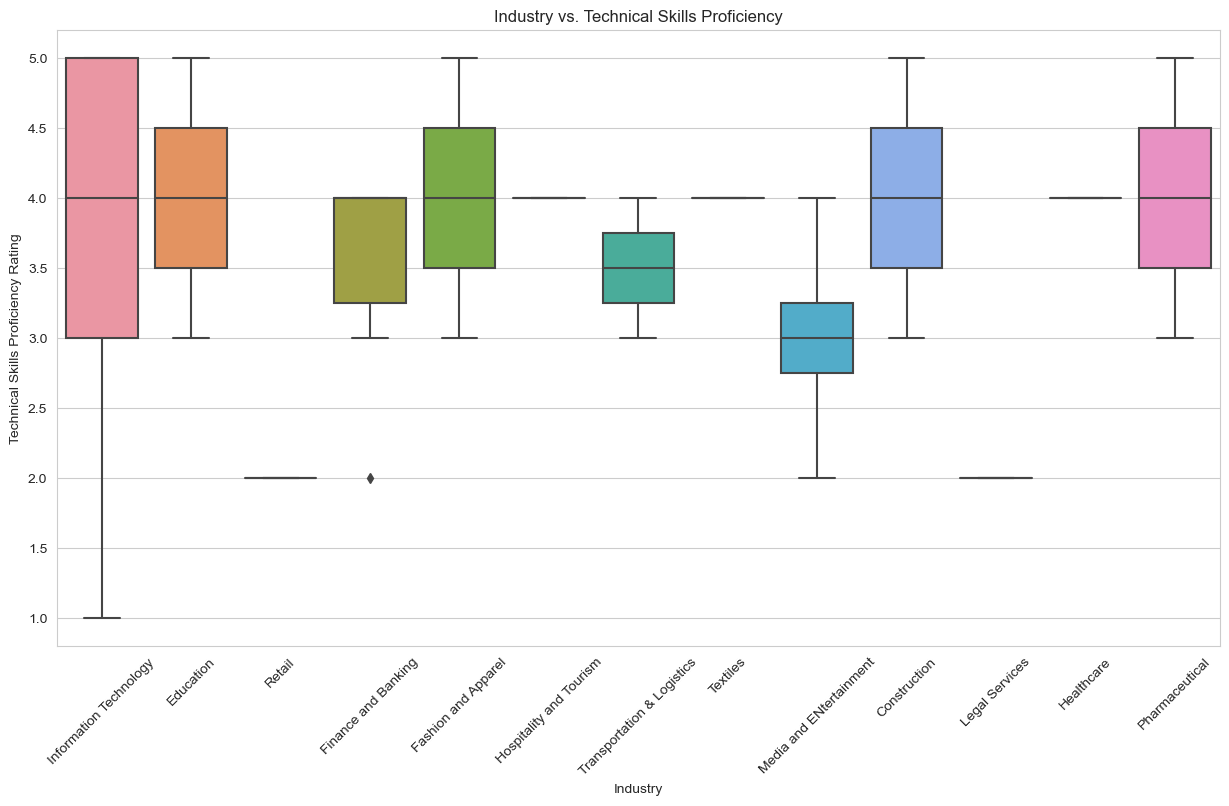

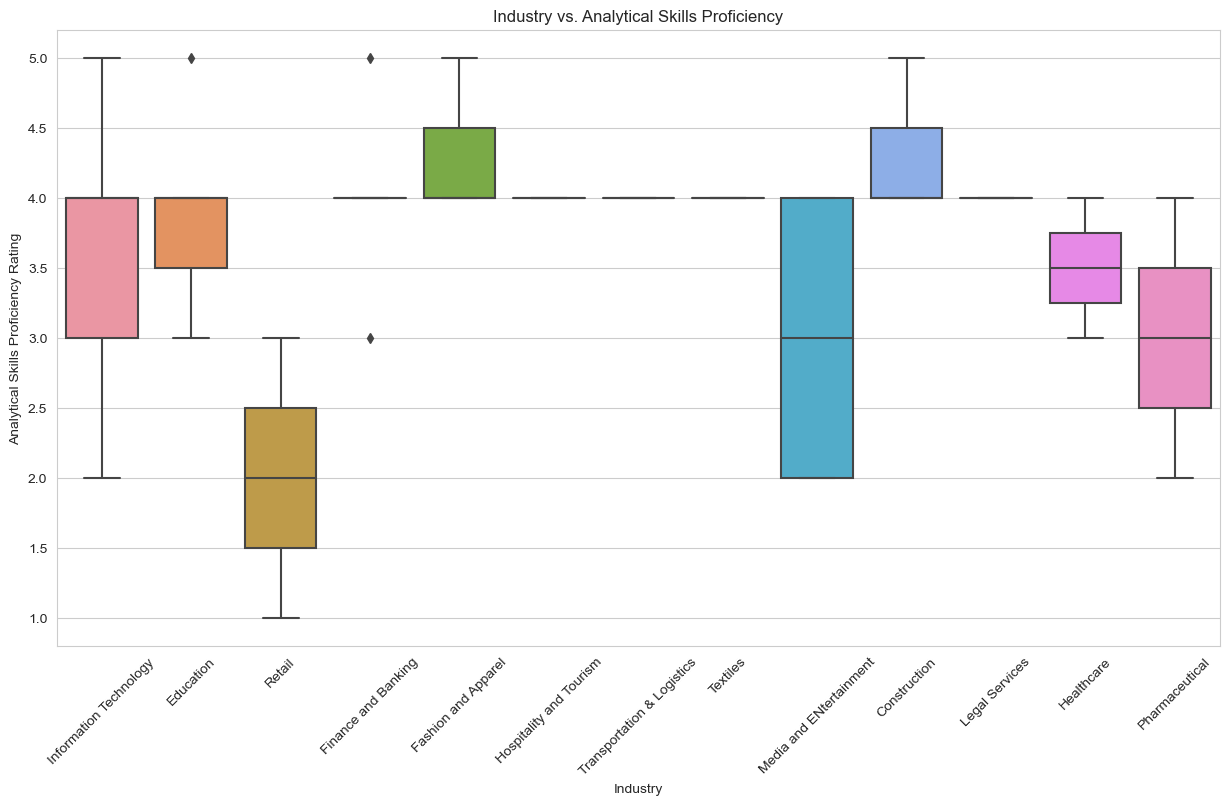

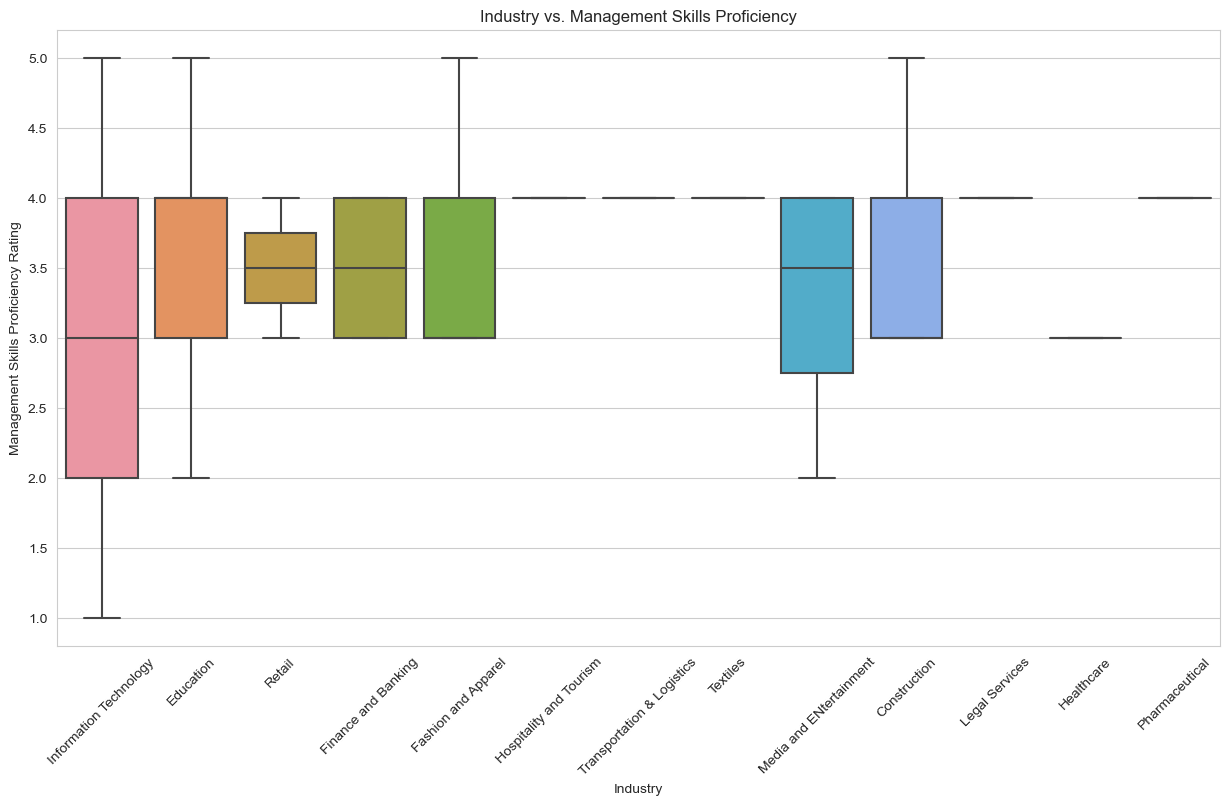

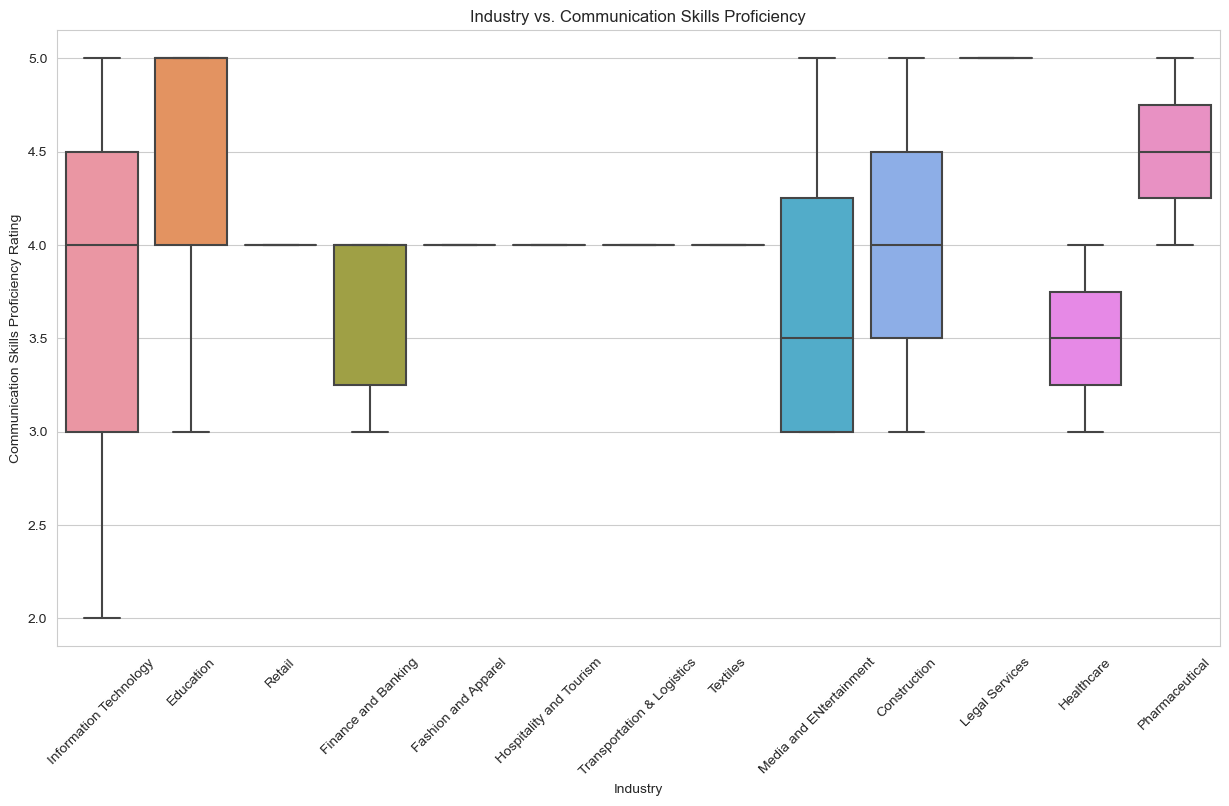

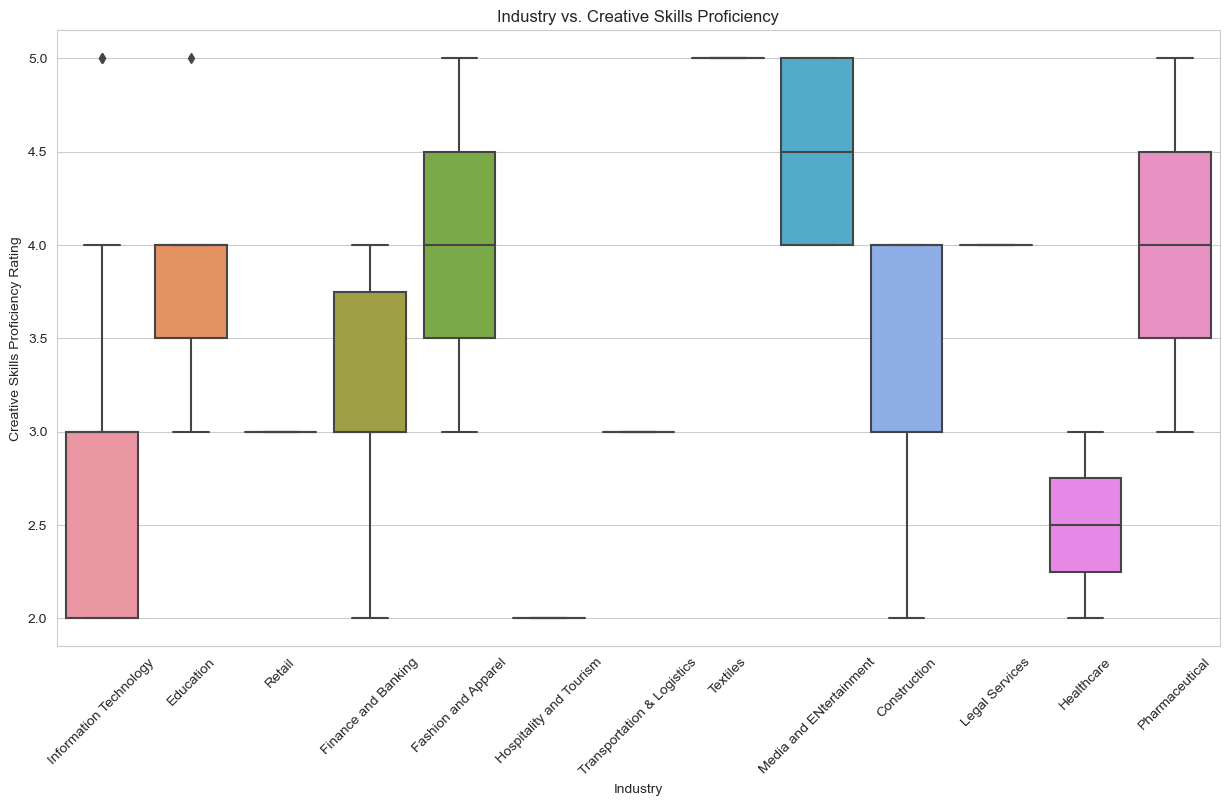

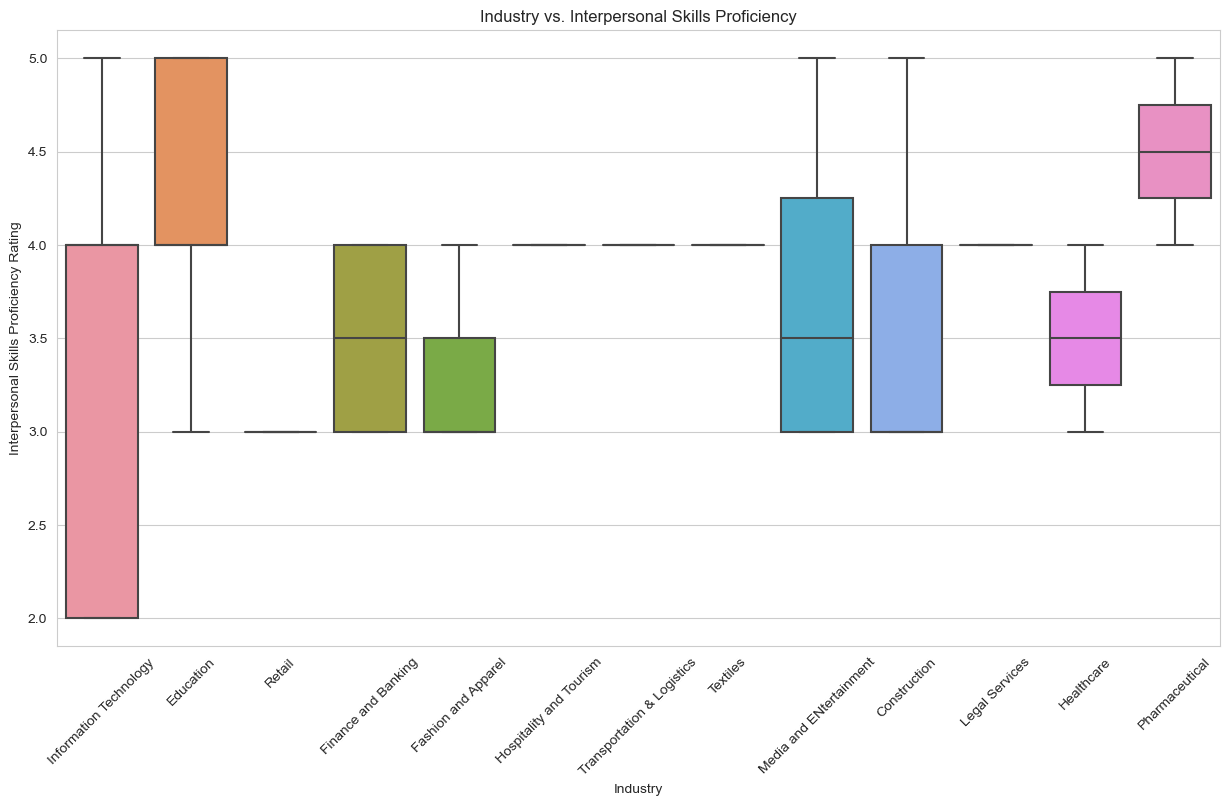

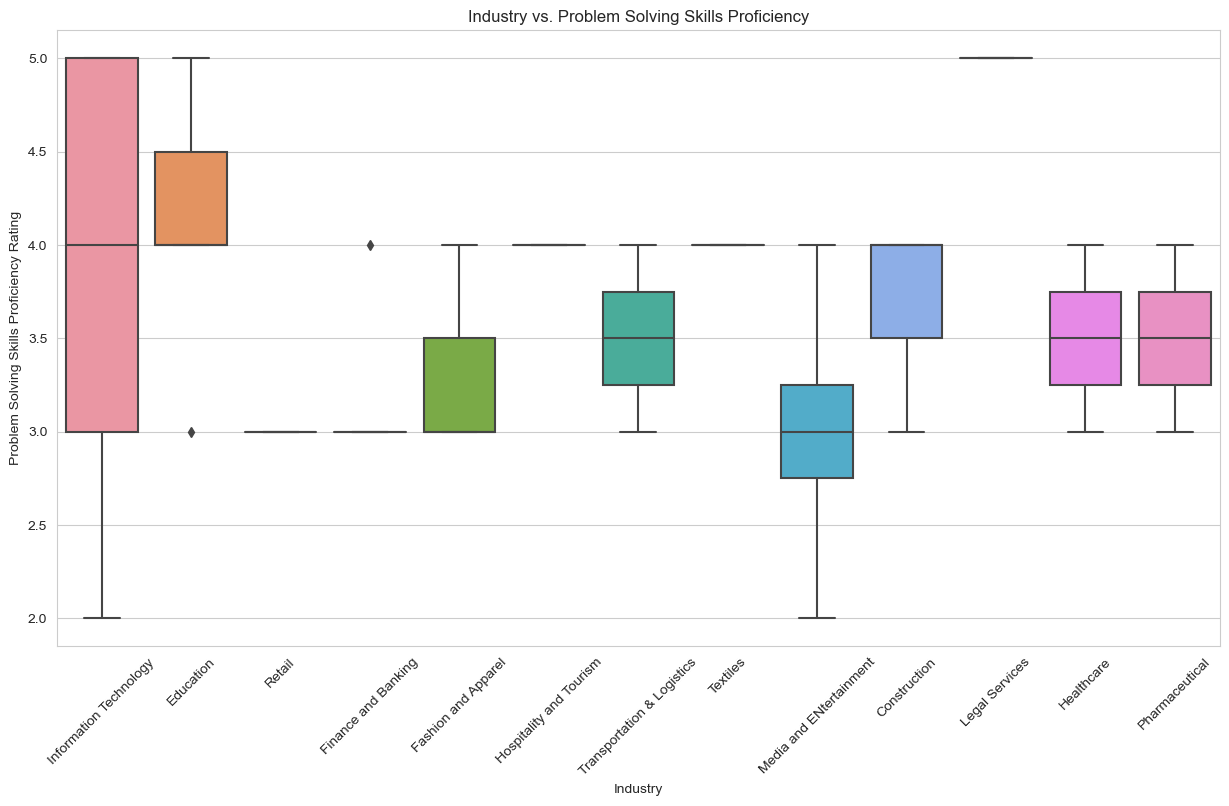

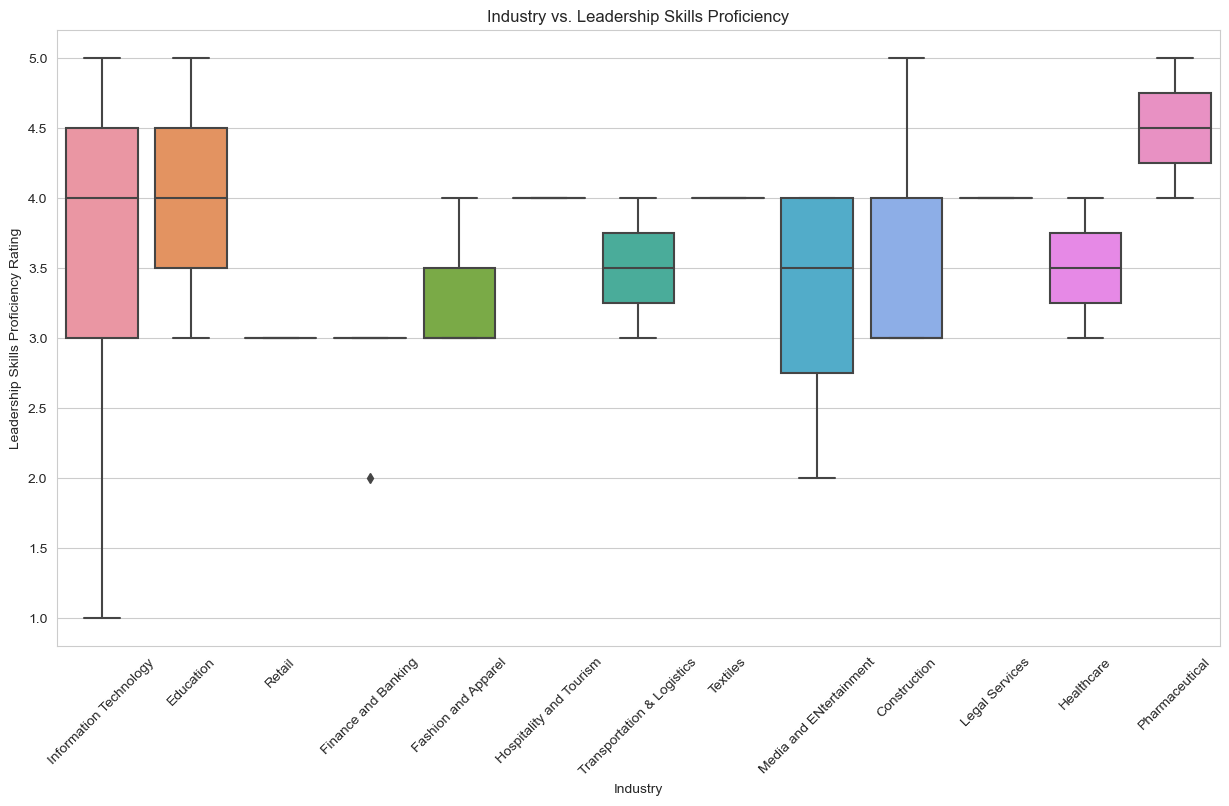

In [305]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import itertools

# Industry vs. Skill Proficiency Levels
# Creating boxplots for each skill category by industry
for skill, proficiency_column in skills_proficiency.items():
    plt.figure(figsize=(15, 8))
    sns.boxplot(x='Industry', y=proficiency_column, data=df)
    plt.xticks(rotation=45)
    plt.title(f'Industry vs. {skill} Proficiency')
    plt.ylabel(f'{skill} Proficiency Rating')
    plt.xlabel('Industry')
    plt.show()


In [318]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'skills_proficiency' is a dictionary mapping skills to their respective column names

def calculate_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group < lower_bound) | (group > upper_bound)]

industry_wise_stats = {}

for skill, proficiency_column in skills_proficiency.items():
    industry_stats = df.groupby('Industry')[proficiency_column].describe()
    outliers = df.groupby('Industry')[proficiency_column].apply(calculate_outliers).dropna()
    industry_wise_stats[skill] = {
        'Descriptive Statistics': industry_stats,
        'Outliers': outliers
    }

# Display the results
for skill, data in industry_wise_stats.items():
    print(f"\nSkill: {skill}\n")
    print("Descriptive Statistics:")
    print(data['Descriptive Statistics'])
    print("\nOutliers:")
    print(data['Outliers'])



Skill: Technical Skills

Descriptive Statistics:
                            count      mean       std  min   25%  50%   75%  \
Industry                                                                      
Construction                  3.0  4.000000  1.000000  3.0  3.50  4.0  4.50   
Education                     7.0  4.000000  0.816497  3.0  3.50  4.0  4.50   
Fashion and Apparel           3.0  4.000000  1.000000  3.0  3.50  4.0  4.50   
Finance and Banking           6.0  3.500000  0.836660  2.0  3.25  4.0  4.00   
Healthcare                    2.0  4.000000  0.000000  4.0  4.00  4.0  4.00   
Hospitality and Tourism       1.0  4.000000       NaN  4.0  4.00  4.0  4.00   
Information Technology       19.0  3.684211  1.249561  1.0  3.00  4.0  5.00   
Legal Services                1.0  2.000000       NaN  2.0  2.00  2.0  2.00   
Media and ENtertainment       4.0  3.000000  0.816497  2.0  2.75  3.0  3.25   
Pharmaceutical                2.0  4.000000  1.414214  3.0  3.50  4.0  4.50   
Re

In [306]:
# Calculating average proficiency for each skill by industry
for skill, proficiency_column in skills_proficiency.items():
    industry_avg = df.groupby('Industry')[proficiency_column].mean()
    high_proficiency = industry_avg[industry_avg > 4].sort_values(ascending=False)
    low_proficiency = industry_avg[industry_avg < 2].sort_values()

    print(f"\nSkill: {skill}")
    print("Industries with High Proficiency (Avg > 4):")
    print(high_proficiency)
    print("Industries with Low Proficiency (Avg < 2):")
    print(low_proficiency)



Skill: Technical Skills
Industries with High Proficiency (Avg > 4):
Series([], Name: TechSkillProficiency, dtype: float64)
Industries with Low Proficiency (Avg < 2):
Series([], Name: TechSkillProficiency, dtype: float64)

Skill: Analytical Skills
Industries with High Proficiency (Avg > 4):
Industry
Construction           4.333333
Fashion and Apparel    4.333333
Name: AnalyticalSkillProficiency, dtype: float64
Industries with Low Proficiency (Avg < 2):
Series([], Name: AnalyticalSkillProficiency, dtype: float64)

Skill: Management Skills
Industries with High Proficiency (Avg > 4):
Series([], Name: ManagementSkillProficiency, dtype: float64)
Industries with Low Proficiency (Avg < 2):
Series([], Name: ManagementSkillProficiency, dtype: float64)

Skill: Communication Skills
Industries with High Proficiency (Avg > 4):
Industry
Legal Services    5.000000
Pharmaceutical    4.500000
Education         4.428571
Name: CommunicationSkillProficiency, dtype: float64
Industries with Low Proficiency 

In [307]:
# Education Level vs. Future Skill Requirements
def extract_and_count_skills_future(response_series):
    split_skills = response_series.dropna().astype(str).str.split(',').apply(lambda x: [skill.strip() for skill in x])
    all_skills = list(itertools.chain(*split_skills))
    return Counter(all_skills)

education_vs_future_skills = pd.DataFrame({
    'Education Level': df['EducationLevel'],
    'Essential Future Skills': df['FutureEssentialSkills']
})

education_levels = df['EducationLevel'].unique()
future_skills_by_education = {}
for level in education_levels:
    skills = extract_and_count_skills_future(education_vs_future_skills[education_vs_future_skills['Education Level'] == level]['Essential Future Skills'])
    future_skills_by_education[level] = skills

for level, skills in future_skills_by_education.items():
    print(f"\nEducation Level: {level}\nSkills:\n{skills}")



Education Level: Bachelor's Degree
Skills:
Counter({'Communication Skills': 18, 'Management Skills': 15, 'Leadership Skills': 13, 'Analytical Skills': 12, 'Problem-Solving Skills': 11, 'Interpersonal Skills': 10, 'Technical Skills': 9, 'Creative Skills': 4, '': 1})

Education Level: High School or Below
Skills:
Counter({'Technical Skills': 2, 'Analytical Skills': 2, 'Management Skills': 2, 'Leadership Skills': 2, 'Interpersonal Skills': 1, 'Communication Skills': 1})

Education Level: Master's Degree
Skills:
Counter({'Analytical Skills': 14, 'Technical Skills': 13, 'Interpersonal Skills': 12, 'Leadership Skills': 12, 'Management Skills': 10, 'Communication Skills': 10, 'Creative Skills': 7, 'Problem-Solving Skills': 5})

Education Level: Vocation Training
Skills:
Counter({'Management Skills': 2, 'Interpersonal Skills': 1, 'Technical Skills': 1, 'Creative Skills': 1, 'Problem-Solving Skills': 1, 'Leadership Skills': 1})

Education Level: Doctorate
Skills:
Counter({'Technical Skills': 1

In [308]:
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set OMP_NUM_THREADS environment variable to avoid memory leak issue
os.environ["OMP_NUM_THREADS"] = "1"

# Select relevant columns for clustering
cluster_columns = list(skills_proficiency.values())

# Data preprocessing
cluster_data = df[cluster_columns].fillna(df[cluster_columns].median())
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Apply K-Means clustering with explicit n_init parameter
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
clusters = kmeans.fit_predict(cluster_data_scaled)
df['Cluster'] = clusters

# Analyze the clusters
for i in range(3):
    print(f"\nCluster {i}:")
    print(df[df['Cluster'] == i][cluster_columns].mean())


C:\Users\sendt\.conda\envs\Survey_Analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Cluster 0:
TechSkillProficiency              2.222222
AnalyticalSkillProficiency        2.333333
ManagementSkillProficiency        2.222222
CommunicationSkillProficiency     3.000000
CreativeSkillProficiency          3.111111
InterpersonalSkillProficiency     2.888889
ProblemSolvingSkillProficiency    2.777778
LeadershipSkillProficiency        2.555556
dtype: float64

Cluster 1:
TechSkillProficiency              4.3750
AnalyticalSkillProficiency        4.4375
ManagementSkillProficiency        4.2500
CommunicationSkillProficiency     4.7500
CreativeSkillProficiency          4.3125
InterpersonalSkillProficiency     4.5625
ProblemSolvingSkillProficiency    4.3125
LeadershipSkillProficiency        4.3750
dtype: float64

Cluster 2:
TechSkillProficiency              3.642857
AnalyticalSkillProficiency        3.785714
ManagementSkillProficiency        3.321429
CommunicationSkillProficiency     3.750000
CreativeSkillProficiency          2.892857
InterpersonalSkillProficiency     3.464286
Prob

In [309]:
import nbformat

def extract_code_from_notebook(notebook_path):
    with open(notebook_path, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)
    code_cells = [cell['source'] for cell in nb['cells'] if cell['cell_type'] == 'code']
    return '\n'.join(code_cells)

notebook_code = extract_code_from_notebook('C:\\Users\\sendt\\Downloads\\sample (1).ipynb')
print(notebook_code)


import pandas as pd

file_path = 'data/survey-responses.csv'
df = pd.read_csv(file_path)
df.head()
df.keys()
# Updated mapping of old column names to new column names
column_name_mapping = {
    'Timestamp': 'Timestamp',
    'Age': 'Age',
    'Gender': 'Gender',
    'Current Job Title': 'JobTitle',
    'Industry': 'Industry',
    'Year of Experience Current Field': 'YearsExperience',
    'Highest Level of Education': 'EducationLevel',
    'Field of Study': 'StudyField',
    'Additional Certifications or Trainings': 'HasCertifications',
    'Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Technical Skills]': 'TechSkillProficiency',
    'Primary Skills required (leave empty if not required) for the current job and your proficiency (Rate from 1[low] - 5[high]) [Analytical Skills]': 'AnalyticalSkillProficiency',
    'Primary Skills required (leave empty if not required) for the current job and your proficiency (R

In [310]:
import nbformat

def extract_code_from_notebook(notebook_path, output_file_path):
    with open(notebook_path, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)

    code_cells = [cell['source'] for cell in nb['cells'] if cell['cell_type'] == 'code']
    notebook_code = '\n'.join(code_cells)

    with open(output_file_path, 'w', encoding='utf-8') as output_file:
        output_file.write(notebook_code)

# Replace with the path to your notebook and desired output file
extract_code_from_notebook('C:\\Users\\sendt\\Downloads\\sample (1).ipynb', 'C:\\Users\\sendt\\Downloads\\output_code_file.py')
